In [2]:
# !pip install -r requirements.txt

In [3]:
import investpy
import time
import pandas as pd
import numpy as np
import quantstats as qs
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
etfs = investpy.get_etfs(country='united states')

In [5]:
etf_tickers = ["XLB", # Materials. 1998-12-22
               "XLE", # Energy. 1998-12-22
               "XLF", # Financial. 1998-12-22
               "XLI", # Industrial. 1998-12-22
               "XLK", # Technology. 1998-12-22
               "XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
               "XLU", # Utilities. 1998-12-22
               "XLV", # Health Care. 1998-12-22
               "XLY", # Consumer Discretionary. 1998-12-22
               "GLD", # Oro. 2004-11-18 *******************************
               "SHV", # Short Treasury Bond. 2007-01-11 ***************
               "SHY", # 1-3 Year Treasury Bond. 2002-07-30
               "IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
               "IEF", # 7-10 Year Treasury Bond. 2002-07-30
               "TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
               "TLT", # +20 Year Treasury Bond. 2002-07-30
               "TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
               "ICF", # Inmobiliario. 2001-02-02
               "IYZ", # Telecomunicaciones. 2000-05-22
               'HYG' # High Yield. 2007
               ]



In [6]:
etf_highYield = ['HYG', 'PHB', 'JNK', 'BKLN']

In [7]:
datayf_hy = yf.download(# tickers list or string as well
        tickers = etf_highYield,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None)



[*********************100%***********************]  4 of 4 completed


In [8]:
closeyf_hy = datayf_hy.xs('Close',level=1,axis=1)
#closeyf.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

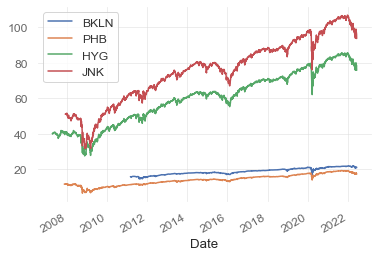

In [9]:
closeyf_hy.plot()

HYG es el que tiene más histórico y encaja mejor por fechas

In [10]:
closeyf_hy.loc[:,'HYG']

Date
2007-04-11    40.048359
2007-04-12    40.075207
2007-04-13    40.002316
2007-04-16    39.986961
2007-04-17    39.967758
                ...    
2022-06-06    78.050003
2022-06-07    78.230003
2022-06-08    77.559998
2022-06-09    76.940002
2022-06-10    75.629997
Name: HYG, Length: 3821, dtype: float64

In [11]:
datayf = yf.download(# tickers list or string as well
        tickers = etf_tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None)



[*********************100%***********************]  20 of 20 completed


In [12]:
closeyf = datayf.xs('Close',level=1,axis=1)
#closeyf.plot(figsize=(20,10))

In [13]:
closeyf.to_csv('datosCierre.csv')

In [14]:
max_first_valid_index = pd.Timestamp('1900-01-01')
for col_name in closeyf.columns.sort_values():
  data = closeyf[col_name]

  if max_first_valid_index < data.first_valid_index():
    max_first_valid_index = data.first_valid_index()

  print(f"{col_name} --> desde {data.first_valid_index()} hasta {data.last_valid_index()} --> {etfs[(etfs.symbol == col_name) & (etfs.country == 'united states')].name.iloc[0]}")

# Descartamos algún dato, para empezar todo desde el mismo punto
closeyf = closeyf.loc[max_first_valid_index:,]
#closeyf.plot(figsize=(20,10))

GLD --> desde 2004-11-18 00:00:00 hasta 2022-06-10 00:00:00 --> SPDR Gold Shares
HYG --> desde 2007-04-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares iBoxx $ High Yield Corporate Bond
ICF --> desde 2001-02-02 00:00:00 hasta 2022-06-10 00:00:00 --> iShares Cohen & Steers REIT
IEF --> desde 2002-07-30 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 7-10 Year Treasury Bond
IEI --> desde 2007-01-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 3-7 Year Treasury Bond
IYZ --> desde 2000-05-26 00:00:00 hasta 2022-06-10 00:00:00 --> iShares US Telecommunications
SHV --> desde 2007-01-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares Short Treasury Bond
SHY --> desde 2002-07-30 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 1-3 Year Treasury Bond
TIP --> desde 2003-12-05 00:00:00 hasta 2022-06-10 00:00:00 --> iShares TIPS Bond
TLH --> desde 2007-01-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 10-20 Year Treasury Bond
TLT --> desde 2002-07-30 00:00:00 hasta 2022-06-10 00:00:00 --> iShare

<AxesSubplot:xlabel='Date'>

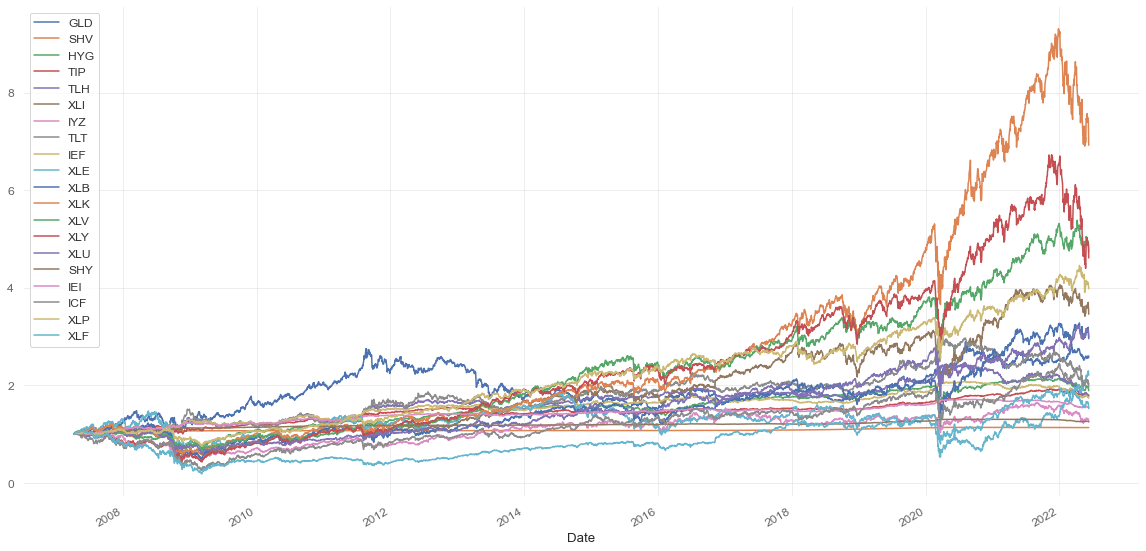

In [15]:
(closeyf/closeyf.iloc[0,]).plot(figsize=(20,10))

In [16]:
# Se calcula en un nuevo DF los retornos logaritmicos
logReturns = pd.DataFrame()
for column in closeyf.columns:
  logReturns[column] = np.log(closeyf[column]/closeyf[column].shift(1)).iloc[1:]

logReturns

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,-0.001343,0.000275,0.000671,0.000000,0.001001,0.011993,0.006683,0.000229,0.000970,0.015189,0.008804,0.010528,0.011231,0.006971,-0.004410,-0.000125,-0.000199,-0.007489,0.001112,-0.001686
2007-04-13,0.012609,0.000183,-0.001822,-0.002497,-0.002104,-0.000278,0.004430,-0.003095,-0.001699,0.000476,0.002318,0.000837,0.014500,0.000771,-0.000245,-0.000499,-0.001098,0.014442,0.003327,0.004211
2007-04-16,0.008221,0.000183,-0.000383,0.003196,0.003506,0.008010,0.009741,0.005496,0.001092,0.005851,0.013285,0.008338,0.009551,0.009976,0.005877,-0.000125,0.000698,-0.002601,0.002212,0.024078
2007-04-17,-0.005865,0.000092,-0.000480,0.000598,0.004390,0.000000,-0.001252,0.005577,0.004237,-0.005693,-0.009435,0.002073,0.003070,0.004065,0.004628,0.001623,0.003187,0.014178,0.009166,-0.000274
2007-04-18,0.005573,0.000640,0.000288,0.003284,0.003081,0.002747,0.002501,0.004982,0.002293,-0.003495,-0.005395,-0.002489,-0.000279,-0.000761,0.007264,0.001370,0.001490,-0.005819,-0.002558,0.011423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.004413,-0.000182,-0.007531,-0.006530,-0.015592,0.004177,0.001852,-0.018616,-0.007536,-0.001118,0.009417,0.000071,0.000154,0.009950,0.004429,-0.001324,-0.004021,-0.003877,0.000406,0.002864
2022-06-07,0.006497,0.000000,0.002304,0.002379,0.008489,0.013355,0.005534,0.010742,0.004020,0.029425,0.007175,0.011858,0.012932,-0.002462,0.006008,0.000120,0.001845,0.012046,0.005267,0.007691
2022-06-08,-0.000926,-0.000091,-0.008601,-0.002464,-0.007320,-0.018265,-0.001473,-0.008900,-0.003725,0.002170,-0.020986,-0.011358,-0.007938,-0.005921,-0.019760,-0.000723,-0.001761,-0.024712,-0.012333,-0.017750


In [17]:
closeyf.iloc[0:,:]

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-11,67.080002,97.161079,40.048367,65.258133,67.082336,26.281355,20.634253,56.170353,58.036030,40.212605,27.625568,18.941734,26.538860,31.341774,23.870907,65.979866,77.098755,30.897478,18.079157,21.357561
2007-04-12,66.989998,97.187759,40.075253,65.258133,67.149529,26.598452,20.772608,56.183228,58.092342,40.828072,27.869848,19.142208,26.838598,31.561012,23.765875,65.971649,77.083435,30.666943,18.099274,21.321577
2007-04-13,67.839996,97.205551,40.002300,65.095398,67.008362,26.591070,20.864841,56.009586,57.993736,40.847500,27.934519,19.158241,27.230583,31.585361,23.760052,65.938721,76.998863,31.113041,18.159599,21.411543
2007-04-16,68.400002,97.223373,39.986977,65.303764,67.243713,26.804926,21.069075,56.318253,58.057117,41.087219,28.308117,19.318642,27.491898,31.902027,23.900091,65.930473,77.052635,31.032209,18.199821,21.933344
2007-04-17,68.000000,97.232285,39.967789,65.342827,67.539589,26.804926,21.042721,56.633240,58.303650,40.853985,28.042276,19.358732,27.576441,32.031963,24.010948,66.037582,77.298569,31.475319,18.367409,21.927332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,171.820007,110.169998,78.050003,117.540001,119.639999,95.949997,26.877621,113.889999,101.790001,89.410004,87.489998,140.000000,129.839996,154.529999,74.680000,83.010002,119.139999,64.164543,73.849998,34.970001
2022-06-07,172.940002,110.169998,78.230003,117.820000,120.660004,97.239998,27.026775,115.120003,102.199997,92.080002,88.120003,141.669998,131.529999,154.149994,75.129997,83.019997,119.360001,64.942169,74.239998,35.240002
2022-06-08,172.779999,110.160004,77.559998,117.529999,119.779999,95.480003,26.987000,114.099998,101.820000,92.279999,86.290001,140.070007,130.490005,153.240005,73.660004,82.959999,119.150002,63.356998,73.330002,34.619999


In [18]:
closeyf = closeyf.iloc[1:,:]

Voy a generar un índice sintético:
https://medium.com/python-financial-analysis/python-financial-analysis-4-2-custom-market-index-ef7873926034


Tengo que evitar el índice esté basado en el precio. Si se basa en precio, sólo por cotización unos ETFs pesar´na más que otros y el índice tendrá un sesgo. Esto es así si los pongo en base 1 y equipondero?

In [19]:
closeyf.head(3)

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,66.989998,97.187759,40.075253,65.258133,67.149529,26.598452,20.772608,56.183228,58.092342,40.828072,27.869848,19.142208,26.838598,31.561012,23.765875,65.971649,77.083435,30.666943,18.099274,21.321577
2007-04-13,67.839996,97.205551,40.002300,65.095398,67.008362,26.591070,20.864841,56.009586,57.993736,40.847500,27.934519,19.158241,27.230583,31.585361,23.760052,65.938721,76.998863,31.113041,18.159599,21.411543
2007-04-16,68.400002,97.223373,39.986977,65.303764,67.243713,26.804926,21.069075,56.318253,58.057117,41.087219,28.308117,19.318642,27.491898,31.902027,23.900091,65.930473,77.052635,31.032209,18.199821,21.933344


In [20]:
precio_cero = (closeyf/closeyf.iloc[0,])
precio_cero.head()

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-13,1.012688,1.000183,0.998180,0.997506,0.997898,0.999722,1.004440,0.996909,0.998303,1.000476,1.002320,1.000838,1.014605,1.000771,0.999755,0.999501,0.998903,1.014547,1.003333,1.004219
2007-04-16,1.021048,1.000366,0.997797,1.000699,1.001403,1.007763,1.014272,1.002403,0.999394,1.006347,1.015726,1.009217,1.024342,1.010805,1.005647,0.999376,0.999600,1.011911,1.005555,1.028692
2007-04-17,1.015077,1.000458,0.997318,1.001298,1.005809,1.007763,1.013003,1.008010,1.003637,1.000635,1.006187,1.011311,1.027492,1.014922,1.010312,1.000999,1.002791,1.026360,1.014815,1.028410
2007-04-18,1.020749,1.001099,0.997605,1.004591,1.008912,1.010535,1.015540,1.013045,1.005941,0.997144,1.000773,1.008798,1.027205,1.014150,1.017678,1.002372,1.004286,1.020404,1.012222,1.040225


Calculo el peso de cada ETF

In [21]:
peso = 1/precio_cero.shape[1]
peso

0.05

In [22]:
ew_index_base_cero = np.sum(precio_cero*peso, axis=1)

In [23]:
ew_index_base_cero

Date
2007-04-12    1.000000
2007-04-13    1.002255
2007-04-16    1.008118
2007-04-17    1.009830
2007-04-18    1.011164
                ...   
2022-06-06    2.702260
2022-06-07    2.723911
2022-06-08    2.697010
2022-06-09    2.654220
2022-06-10    2.603755
Length: 3820, dtype: float64

<AxesSubplot:xlabel='Date'>

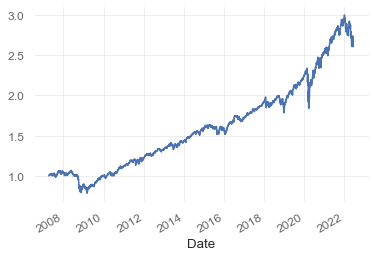

In [24]:
ew_index_base_cero.plot()

Me permite este índice identificar cuáles son los sectores que suben o bajan? Veo dos cosas. La primera es que se identifica la correción del covid (y tiene sentido), o sea que parece que está bien calculado. Lo segundo es que tiene tendencia alcista, porque cuando uno o varios sectores caen, entiendo que el resto tira, pero no veo como sacar info de aquí

Y si hago un índice que vaya teniendo en cuenta los X sectores que más tiran por periodo? Se me ocurre que puedo hacer varios índices y sacar features de cada uno...
En primer lugar, cómo de estables es esa relación de TOP por periodos?

In [25]:
def seleccion_top_X(data, periodo, X):
    '''
       Devuelve df con los activos ordenados por volatildad
       cada día. El índice son fechas, las columnas el orden
       y los valores del DF son los ticker de los activos.

    '''
    data = data.resample(periodo).last()
    # Primero verifico que el df de datos está completo
    rent_activos = np.log(data).diff()
    rent_activos.iloc[0,:] = 0


    ranking = []
    for fila in range(rent_activos.shape[0]):
        ranking.append(rent_activos.iloc[fila, :X].sort_values(ascending=True).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=rent_activos.index)
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

Esto es un ranking por rentabilidad

In [26]:
ranking = seleccion_top_X(closeyf,'2M', 5)
ranking

,0,1,2,3,4
Date,,,,,
2007-04-30,GLD,SHV,HYG,TIP,TLH
2007-06-30,GLD,HYG,TLH,TIP,SHV
2007-08-31,SHV,HYG,TIP,GLD,TLH
2007-10-31,SHV,TLH,TIP,HYG,GLD
2007-12-31,HYG,SHV,TLH,TIP,GLD
...,...,...,...,...,...
2021-10-31,TLH,GLD,HYG,SHV,TIP
2021-12-31,SHV,TLH,HYG,TIP,GLD
2022-02-28,TLH,HYG,TIP,SHV,GLD


Con esta idea, puedo aplicar distintos ratios (sharpe, jensen, rentabilida_máxima..) y buscar carteras. Estos activos, tendrían etiqueta 1 y el resto 0 en ese periodo.

Ahora tengo un problema. Con estos filtros, en el mismo periodo voy a tener distintas carteras TOP5 y la red no sabrá qué aprender. De momento voy calcular algunos.


Calculo la Beta

beta = cov(rent_i, rent_mercado)/var(rent_mercado)

In [27]:
def calcular_beta(data, indice, periodo):

    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    return beta.iloc[periodo:,:]

In [28]:
beta = calcular_beta(closeyf, ew_index_base_cero, 40) # Tomo como reerncia 2M (40 días de tading)
beta.head()

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,1.226691,0.001094,0.069852,0.207295,0.280717,1.277782,1.589652,0.441897,0.211415,1.959673,2.003606,1.313491,1.068854,1.526539,1.833439,0.016818,0.093609,2.226653,0.944889,1.595621
2007-06-11,1.188398,0.001205,0.077220,0.216006,0.287862,1.291755,1.592888,0.452220,0.217358,1.973452,2.015192,1.323152,1.032459,1.535706,1.836924,0.018638,0.096773,2.197817,0.939586,1.594314
2007-06-12,1.114977,0.002723,0.145564,0.247874,0.371583,1.325323,1.598625,0.544349,0.274929,1.962953,1.909366,1.330821,0.966537,1.433187,1.836251,0.031618,0.136067,2.219889,0.976706,1.462849
2007-06-13,1.086191,-0.002187,0.149658,0.267138,0.422746,1.439062,1.497039,0.626561,0.279596,1.956359,1.976129,1.305978,0.940728,1.389301,1.853138,0.026862,0.135920,2.088205,0.928396,1.511199
2007-06-14,1.074355,-0.000804,0.150481,0.263023,0.410264,1.435787,1.501683,0.606379,0.276024,1.999545,1.991034,1.329017,0.942268,1.403254,1.849290,0.024528,0.131643,2.081514,0.928109,1.472032


Me puede interesar buscar o filtar los ETFs con Beta positiva máxima. Esto me va a indicar que activos se han movido más que el mercado. Si pienso en que busco los activos que "amplifican" el valor del mercado en la dirección del movimineto, debería estar obteniendo los valores que más tiran de mi índice sintético

Alfa de Jensen

alpha = (rentabilidad_cartera -fisk_free) - Beta*(rentabilidad_mercado - risk_free)

In [29]:
def calcular_alfa_jensen(data, indice, periodo):
    '''Supongo la rentabilidad del activo libre
    de riesgo '0'. POr eso no cosidero éste activo en
    el cálculo. Voy a calcular la alfa de cada activo
    sólo sobre el índice.
    '''
    # No Llamo a la función calcular Beta porque necesito las tripas
    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    alpha_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del DAX y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    # Ahora calculo alfa:
    alpha=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)
    Rfactivos=pd.DataFrame(np.ones((beta.shape[0] , beta.shape[1])), index=beta.index, columns=beta.columns)

     # Calculamos el Alpha del activo. α=Rc-(Rf+β(Rm-Rf))
    alpha[periodo:alpha.shape[0]] = (rent_activos[periodo:rent_activos.shape[0]] -
                                beta[periodo:beta.shape[0]].mul(rent_indice[periodo:rent_activos.shape[0]], axis=0)
                                )

    alpha=alpha[periodo:alpha.shape[0]]

    return alpha

In [30]:
alpha = calcular_alfa_jensen(closeyf, ew_index_base_cero, 40)
alpha

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,-0.022584,0.000177,-0.003056,0.000734,-0.000872,0.007017,0.007807,-0.003183,0.000745,-0.006284,0.008342,0.006928,-0.002328,0.004652,-0.002590,0.000286,-0.000497,-0.001877,0.000822,0.003140
2007-06-11,0.007456,0.000092,-0.002114,-0.002140,-0.002689,0.001303,-0.001748,-0.002865,-0.002615,0.007643,-0.008685,0.001982,0.000287,-0.003291,0.013166,0.000126,0.000204,-0.017290,0.005455,0.004570
2007-06-12,0.001542,0.000118,-0.003695,-0.003834,-0.007640,-0.000096,0.001670,-0.009285,-0.004459,0.006768,0.006286,0.001076,0.002136,0.005781,0.001418,-0.000569,-0.002936,0.004219,0.000051,0.000513
2007-06-13,-0.004468,-0.000161,0.000202,0.000950,0.003386,0.008765,-0.006479,0.005396,0.000390,-0.000316,0.002944,-0.000738,-0.001546,-0.002785,0.000698,-0.000025,0.000230,-0.009147,-0.001885,0.003285
2007-06-14,-0.002342,0.000734,0.000292,-0.000226,-0.002869,0.000522,0.002270,-0.004456,-0.000629,0.010308,0.001278,0.005163,-0.000222,0.002603,0.000344,-0.000078,-0.000826,-0.006638,-0.001509,-0.006292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.004368,-0.000181,-0.007359,-0.006481,-0.015565,0.004589,0.002289,-0.018583,-0.007524,-0.000662,0.009870,0.000732,0.000515,0.010669,0.004671,-0.001320,-0.004014,-0.003451,0.000757,0.003308
2022-06-07,0.005384,-0.000020,-0.001559,0.001261,0.007762,0.004007,-0.004316,0.009835,0.003688,0.018932,-0.003036,-0.003064,0.004697,-0.018497,0.000523,0.000018,0.001663,0.002367,-0.002649,-0.002329
2022-06-08,0.000575,-0.000067,-0.003762,-0.001058,-0.006480,-0.006349,0.010764,-0.007916,-0.003341,0.014707,-0.007983,0.007033,0.002130,0.013912,-0.012849,-0.000580,-0.001529,-0.012475,-0.002310,-0.005020


Ratio Sharpe

Sharpe = (rent_i - risk_free)/sigma

In [31]:
def calcula_sharpe(data, periodo_ajuste=252):
    """Voy a calcular el ratio de sharpe con
    retorno log.
    Voy a considerar la rentabilidad del activo libre
    de riesgo igual a 0.

    Por defecto, voy a trabajar en ventana de 6 meses,
    pero dejo input para modificar este valor.
    """
    rent_activos = np.log(data).diff()
    volatilidad = rent_activos.std()
    # sharpe = rent_activos.iloc[ventana:] / volatilidad.iloc[ventana:]
    sharpe = np.sqrt(periodo_ajuste)*(rent_activos / volatilidad)
    sharpe.replace([np.inf, -np.inf], 0, inplace=True)

    return sharpe


In [32]:
sharpe = calcula_sharpe(closeyf, 252)
sharpe

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13,17.857828,13.100750,-3.956874,-9.879147,-5.328758,-0.308538,5.052885,-5.188565,-6.352271,0.376926,2.329578,0.919854,20.417734,0.849601,-0.316352,-9.356609,-7.102180,10.874283,5.578515,3.228429
2007-04-16,11.643435,13.120818,-0.832059,12.644870,8.877820,8.904479,11.109580,9.212171,4.084297,4.636075,13.353158,9.160331,13.448727,10.989942,7.586495,-2.344220,4.516569,-1.958770,3.709193,18.461442
2007-04-17,-8.306915,6.559507,-1.042336,2.366045,11.116895,0.000000,-1.427491,9.348915,15.844312,-4.510301,-9.483444,2.277657,4.323720,4.477930,5.974110,30.421697,20.617058,10.675699,15.366775,-0.210193
2007-04-18,7.892637,45.821152,0.624426,12.993084,7.800879,3.054065,2.852477,8.351607,8.572132,-2.768992,-5.422441,-2.734212,-0.392756,-0.838670,9.377488,25.678805,9.637750,-4.381877,-4.288183,8.758433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-6.250852,-12.994179,-16.354384,-25.835425,-39.479403,4.643861,2.111717,-31.203882,-28.178734,-0.885622,9.464706,0.078437,0.216804,10.961891,5.717264,-24.818355,-26.013685,-2.919145,0.681149,2.195754
2022-06-07,9.202207,0.000000,5.002581,9.414230,21.496149,14.845875,6.311711,18.005915,15.030610,23.313294,7.211658,13.028175,18.210337,-2.712434,7.755592,2.256320,11.935907,9.070631,8.830187,5.897192
2022-06-08,-1.310982,-6.493018,-18.679523,-9.750940,-18.534895,-20.304418,-1.679764,-14.918032,-13.928792,1.718980,-21.092822,-12.478912,-11.178376,-6.522674,-25.509428,-13.548892,-11.392775,-18.607353,-20.676528,-13.609872


Por curiosidad hago un resample de 2 meses

In [33]:
test_sharpe =calcula_sharpe(closeyf, 252).resample('2M').last()
test_sharpe.head()

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,-9.887481,13.120456,0.206647,21.141406,13.579265,-13.070800,-5.727692,17.466837,16.202732,-9.445479,-18.565778,-8.515069,-4.671166,-14.059752,-4.950057,13.988607,19.228079,-5.903573,-6.107383,-5.984662
2007-06-30,0.220266,19.632374,-6.176340,23.256421,21.047949,3.993894,-3.041016,17.209879,19.419363,2.760920,6.223678,-3.855825,-3.982176,1.401511,10.151017,37.460432,20.822980,-5.223640,1.860609,-4.226829
2007-08-31,15.413408,-13.004973,19.526550,-1.564497,-2.000281,16.763319,8.623247,1.320855,0.888748,10.392693,9.025779,7.196095,6.564504,17.898853,-2.673247,0.000000,-1.904662,16.100227,4.367895,10.061682
2007-10-31,23.065610,-6.573895,13.635105,-18.814835,-5.668588,9.636563,9.562410,-15.207863,-25.146130,21.039458,26.234393,12.841071,8.628747,3.311930,14.988585,-29.920031,-22.602824,11.861694,10.655878,10.298164
2007-12-31,-9.244731,-13.079569,4.748479,25.888507,13.782199,-5.098013,-12.678948,10.118692,17.230444,-10.119392,-6.008199,-8.211815,-5.175062,-4.035333,-17.869604,29.671113,19.650082,6.785856,-13.335960,-0.264980


Cojo el top5 del primer periodo

In [34]:
test_sharpe.iloc[1, :].sort_values(ascending=False)

SHY    37.460432
TIP    23.256421
TLH    21.047949
IEI    20.822980
SHV    19.632374
IEF    19.419363
TLT    17.209879
XLU    10.151017
XLB     6.223678
XLI     3.993894
XLE     2.760920
XLP     1.860609
XLY     1.401511
GLD     0.220266
IYZ    -3.041016
XLK    -3.855825
XLV    -3.982176
XLF    -4.226829
ICF    -5.223640
HYG    -6.176340
Name: 2007-06-30 00:00:00, dtype: float64

Me parecen raros estos valores, voy a comprobar.

<AxesSubplot:xlabel='Date'>

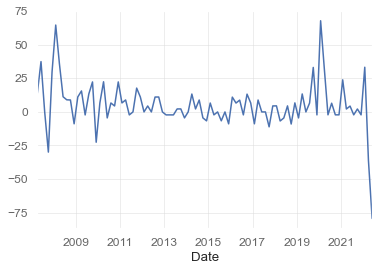

In [35]:
test_sharpe.loc[:, 'SHY'].plot()

C:\Users\nicol\Documents\mIA-x\TFM\Backtest\venv\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


<AxesSubplot:xlabel='Date'>

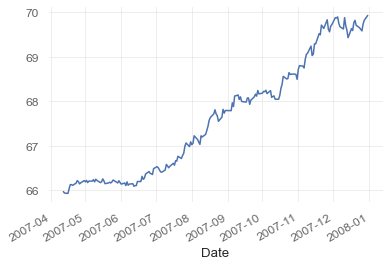

In [36]:
closeyf.loc[:'31-12-2007', 'SHY'].plot()

El cáclulo del ratio de sharpe está bien y viendo los datos tiene sentido...la varaición es muy baja con rentabilidad positiva. Quizá deberíamos contrastar los datos con otra fuente.

Comparo con la primera cartera que tenía por rentabilidad

In [37]:
ranking.iloc[1]

0    GLD
1    HYG
2    TLH
3    TIP
4    SHV
Name: 2007-06-30 00:00:00, dtype: object

Me hago una función que me ordene un df y me genere carteras seleccionando n_activos.

In [38]:
def seleccion_top_N(data, n_activos):
    ranking = []
    for fila in range(data.shape[0]):
        ranking.append(data.iloc[fila, :].sort_values(ascending=False).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=data.index)
    ranking_df = ranking_df.iloc[:, :5]
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

Ahora voy a calcular ratios

Calculo la Beta

beta = cov(rent_i, rent_mercado)/var(rent_mercado)

In [39]:
def calcular_beta(data, indice, periodo):

    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    return beta.iloc[periodo:,:]

In [40]:
beta = calcular_beta(closeyf, ew_index_base_cero, 40) # Tomo como reerncia 2M (40 días de trading)
beta

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,1.226691,0.001094,0.069852,0.207295,0.280717,1.277782,1.589652,0.441897,0.211415,1.959673,2.003606,1.313491,1.068854,1.526539,1.833439,0.016818,0.093609,2.226653,0.944889,1.595621
2007-06-11,1.188398,0.001205,0.077220,0.216006,0.287862,1.291755,1.592888,0.452220,0.217358,1.973452,2.015192,1.323152,1.032459,1.535706,1.836924,0.018638,0.096773,2.197817,0.939586,1.594314
2007-06-12,1.114977,0.002723,0.145564,0.247874,0.371583,1.325323,1.598625,0.544349,0.274929,1.962953,1.909366,1.330821,0.966537,1.433187,1.836251,0.031618,0.136067,2.219889,0.976706,1.462849
2007-06-13,1.086191,-0.002187,0.149658,0.267138,0.422746,1.439062,1.497039,0.626561,0.279596,1.956359,1.976129,1.305978,0.940728,1.389301,1.853138,0.026862,0.135920,2.088205,0.928396,1.511199
2007-06-14,1.074355,-0.000804,0.150481,0.263023,0.410264,1.435787,1.501683,0.606379,0.276024,1.999545,1.991034,1.329017,0.942268,1.403254,1.849290,0.024528,0.131643,2.081514,0.928109,1.472032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,0.129185,0.002502,0.486709,0.137945,0.075897,1.166187,1.240641,0.094045,0.034696,1.293518,1.287368,1.875542,1.023311,2.037685,0.687089,0.012797,0.019756,1.207178,0.996234,1.259613
2022-06-07,0.139474,0.002446,0.484039,0.140160,0.091166,1.171465,1.234341,0.113646,0.041541,1.315010,1.279560,1.869958,1.031949,2.009357,0.687324,0.012811,0.022818,1.212946,0.991948,1.255631
2022-06-08,0.151239,0.002427,0.487594,0.141696,0.084631,1.200700,1.232992,0.099128,0.038696,1.263250,1.310156,1.853031,1.014463,1.998339,0.696350,0.014407,0.023362,1.232964,1.009884,1.282719


In [41]:
beta_resample = beta.resample('2M').last()
beta_resample

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.919119,-0.000543,0.192249,0.307594,0.470000,1.330214,1.385587,0.685743,0.309730,2.145670,1.875741,1.266871,1.016398,1.197909,2.061729,0.047005,0.161740,2.132020,0.816930,1.523497
2007-08-31,0.424858,-0.018861,0.548279,-0.231762,-0.350049,1.873073,1.731018,-0.362627,-0.344894,2.301943,2.349712,1.598838,1.276158,1.996862,2.024991,-0.133380,-0.290414,2.265582,1.066286,2.381979
2007-10-31,0.622384,-0.008689,0.706358,-0.087213,-0.161674,1.824586,1.434197,-0.347140,-0.271384,2.519240,2.629579,1.413630,1.198928,1.890744,1.417368,-0.059616,-0.109881,2.203473,0.793625,2.350544
2007-12-31,0.979890,-0.022720,0.076104,-0.489371,-0.534612,1.847481,2.372529,-0.613320,-0.472884,2.937207,2.772785,1.843908,1.199298,1.767876,1.018030,-0.169988,-0.380415,2.752548,0.963732,2.939272
2008-02-29,0.156437,-0.014504,0.087041,-0.145164,-0.261893,1.825002,2.326285,-0.250514,-0.295070,2.603633,2.434292,1.846291,0.953559,2.146178,1.697226,-0.095766,-0.205462,3.015806,1.026008,3.265940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.119176,0.001500,0.319803,0.090883,0.163765,1.504188,1.246922,0.244343,0.068489,1.429353,1.577144,1.761262,1.216600,1.362984,0.995050,0.006645,0.028260,1.174530,0.966254,1.611386
2021-12-31,0.253753,0.002996,0.444536,0.094211,-0.328957,1.587559,0.960686,-0.528270,-0.236451,1.915875,1.303970,2.094102,0.713918,1.889120,0.842432,-0.018394,-0.114623,1.373655,0.757434,1.471708
2022-02-28,-0.005829,0.004504,0.405952,0.153903,0.131505,1.211187,1.506408,0.129003,0.129442,0.379712,1.274584,2.099869,1.039040,2.018544,0.801763,0.054821,0.105174,1.264003,0.536451,1.135016


In [42]:
cartera_beta = seleccion_top_N(beta_resample, 5)
cartera_beta

,0,1,2,3,4
Date,,,,,
2007-06-30,XLE,ICF,XLU,XLB,XLF
2007-08-31,XLF,XLB,XLE,ICF,XLU
2007-10-31,XLB,XLE,XLF,ICF,XLY
2007-12-31,XLF,XLE,XLB,ICF,IYZ
2008-02-29,XLF,ICF,XLE,XLB,IYZ
...,...,...,...,...,...
2021-10-31,XLK,XLF,XLB,XLI,XLE
2021-12-31,XLK,XLE,XLY,XLI,XLF
2022-02-28,XLK,XLY,IYZ,XLB,ICF


Me puede interesar buscar o filtar los ETFs con Beta positiva máxima. Esto me va a indicar que activos se han movido más que el mercado. Si pienso en que busco los activos que "amplifican" el valor del mercado en la dirección del movimineto, debería estar obteniendo los valores que más tiran de mi índice sintético

Alfa de Jensen

alpha = (rentabilidad_cartera -fisk_free) - Beta*(rentabilidad_mercado - risk_free)

In [43]:
def calcular_alfa_jensen(data, indice, periodo):
    '''Supongo la rentabilidad del activo libre
    de riesgo '0'. POr eso no cosidero éste activo en
    el cálculo. Voy a calcular la alfa de cada activo
    sólo sobre el índice.
    '''
    # No Llamo a la función calcular Beta porque necesito las tripas
    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    alpha_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del DAX y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    # Ahora calculo alfa:
    alpha=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)
    Rfactivos=pd.DataFrame(np.ones((beta.shape[0] , beta.shape[1])), index=beta.index, columns=beta.columns)

     # Calculamos el Alpha del activo. α=Rc-(Rf+β(Rm-Rf))
    alpha[periodo:alpha.shape[0]] = (rent_activos[periodo:rent_activos.shape[0]] -
                                beta[periodo:beta.shape[0]].mul(rent_indice[periodo:rent_activos.shape[0]], axis=0)
                                )

    alpha=alpha[periodo:alpha.shape[0]]

    return alpha

In [44]:
alpha = calcular_alfa_jensen(closeyf, ew_index_base_cero, 40)
alpha

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,-0.022584,0.000177,-0.003056,0.000734,-0.000872,0.007017,0.007807,-0.003183,0.000745,-0.006284,0.008342,0.006928,-0.002328,0.004652,-0.002590,0.000286,-0.000497,-0.001877,0.000822,0.003140
2007-06-11,0.007456,0.000092,-0.002114,-0.002140,-0.002689,0.001303,-0.001748,-0.002865,-0.002615,0.007643,-0.008685,0.001982,0.000287,-0.003291,0.013166,0.000126,0.000204,-0.017290,0.005455,0.004570
2007-06-12,0.001542,0.000118,-0.003695,-0.003834,-0.007640,-0.000096,0.001670,-0.009285,-0.004459,0.006768,0.006286,0.001076,0.002136,0.005781,0.001418,-0.000569,-0.002936,0.004219,0.000051,0.000513
2007-06-13,-0.004468,-0.000161,0.000202,0.000950,0.003386,0.008765,-0.006479,0.005396,0.000390,-0.000316,0.002944,-0.000738,-0.001546,-0.002785,0.000698,-0.000025,0.000230,-0.009147,-0.001885,0.003285
2007-06-14,-0.002342,0.000734,0.000292,-0.000226,-0.002869,0.000522,0.002270,-0.004456,-0.000629,0.010308,0.001278,0.005163,-0.000222,0.002603,0.000344,-0.000078,-0.000826,-0.006638,-0.001509,-0.006292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.004368,-0.000181,-0.007359,-0.006481,-0.015565,0.004589,0.002289,-0.018583,-0.007524,-0.000662,0.009870,0.000732,0.000515,0.010669,0.004671,-0.001320,-0.004014,-0.003451,0.000757,0.003308
2022-06-07,0.005384,-0.000020,-0.001559,0.001261,0.007762,0.004007,-0.004316,0.009835,0.003688,0.018932,-0.003036,-0.003064,0.004697,-0.018497,0.000523,0.000018,0.001663,0.002367,-0.002649,-0.002329
2022-06-08,0.000575,-0.000067,-0.003762,-0.001058,-0.006480,-0.006349,0.010764,-0.007916,-0.003341,0.014707,-0.007983,0.007033,0.002130,0.013912,-0.012849,-0.000580,-0.001529,-0.012475,-0.002310,-0.005020


In [45]:
alpha_resample = alpha.resample('2M').last()
alpha_resample

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,-0.001432,2.752489e-04,-0.003176,0.005346,0.007501,0.001295,-0.005060,0.009082,0.004658,-0.000222,0.002952,-0.005698,-0.004584,-0.000797,0.004301,0.001918,0.002939,-0.010621,-0.000301,-0.008145
2007-08-31,0.008244,-6.455199e-05,0.005586,0.001044,0.001384,0.003445,-0.003192,0.003041,0.002380,-0.001182,-0.005616,-0.003382,-0.003266,0.003843,-0.014650,0.000829,0.001510,0.007309,-0.004018,-0.001674
2007-10-31,0.012019,-3.228946e-05,0.001436,-0.004157,-0.001130,-0.003839,-0.001448,-0.006693,-0.004865,0.009285,0.008075,0.001997,-0.002091,-0.009955,0.001894,-0.001188,-0.002740,0.000648,0.000915,-0.002683
2007-12-31,-0.004344,-2.333751e-04,0.002356,0.005453,0.004252,-0.000470,-0.005831,0.004670,0.003554,-0.006228,0.000200,-0.003366,-0.001003,0.000276,-0.011574,0.001204,0.002190,0.015145,-0.005807,0.006203
2008-02-29,0.003548,3.576626e-05,-0.002958,0.008998,0.010298,-0.009425,-0.008737,0.012669,0.007672,-0.007602,-0.008294,-0.002018,-0.004353,-0.003674,-0.012820,0.002490,0.006243,0.008508,-0.008684,-0.000336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,-0.008530,-1.809089e-04,-0.002604,-0.002551,0.001035,0.000465,-0.007059,0.003080,0.000444,-0.006421,-0.004619,0.004489,0.009830,0.002750,-0.005843,0.000117,-0.000152,-0.010605,-0.000868,-0.003776
2021-12-31,0.006778,-3.632236e-07,-0.000284,-0.001249,0.002199,0.004069,-0.006779,0.002023,-0.001101,0.002293,0.004266,-0.005131,-0.004336,-0.002623,0.003397,-0.000115,-0.000297,0.003125,0.006675,-0.001969
2022-02-28,0.010322,-9.834616e-05,0.000035,0.016951,0.019190,0.005601,-0.009487,0.021465,0.011084,0.023743,-0.013591,-0.005346,-0.009336,0.003620,0.003818,0.001683,0.006185,-0.020292,-0.014296,-0.016853


Calculo las carteras con alpha de jensen

In [46]:
cartera_alpha = seleccion_top_N(alpha_resample, 5)

Ratio Sharpe

Sharpe = (rent_i - risk_free)/sigma

In [47]:
def calcula_sharpe(data, periodo_ajuste=252):
    """Voy a calcular el ratio de sharpe con
    retorno log.
    Voy a considerar la rentabilidad del activo libre
    de riesgo igual a 0.

    Por defecto, voy a trabajar en ventana de 6 meses,
    pero dejo input para modificar este valor.
    """
    rent_activos = np.log(data).diff()
    volatilidad = rent_activos.std()
    # sharpe = rent_activos.iloc[ventana:] / volatilidad.iloc[ventana:]
    sharpe = np.sqrt(periodo_ajuste)*(rent_activos / volatilidad)
    sharpe.replace([np.inf, -np.inf], 0, inplace=True)

    return sharpe


In [48]:
sharpe = calcula_sharpe(closeyf, 252)
sharpe.head()

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13,17.857828,13.100750,-3.956874,-9.879147,-5.328758,-0.308538,5.052885,-5.188565,-6.352271,0.376926,2.329578,0.919854,20.417734,0.849601,-0.316352,-9.356609,-7.102180,10.874283,5.578515,3.228429
2007-04-16,11.643435,13.120818,-0.832059,12.644870,8.877820,8.904479,11.109580,9.212171,4.084297,4.636075,13.353158,9.160331,13.448727,10.989942,7.586495,-2.344220,4.516569,-1.958770,3.709193,18.461442
2007-04-17,-8.306915,6.559507,-1.042336,2.366045,11.116895,0.000000,-1.427491,9.348915,15.844312,-4.510301,-9.483444,2.277657,4.323720,4.477930,5.974110,30.421697,20.617058,10.675699,15.366775,-0.210193
2007-04-18,7.892637,45.821152,0.624426,12.993084,7.800879,3.054065,2.852477,8.351607,8.572132,-2.768992,-5.422441,-2.734212,-0.392756,-0.838670,9.377488,25.678805,9.637750,-4.381877,-4.288183,8.758433


Por curiosidad hago un resample de 2 meses

In [49]:
sharpe_resample = calcula_sharpe(closeyf, 252).resample('2M').last()
sharpe_resample.head()

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,-9.887481,13.120456,0.206647,21.141406,13.579265,-13.070800,-5.727692,17.466837,16.202732,-9.445479,-18.565778,-8.515069,-4.671166,-14.059752,-4.950057,13.988607,19.228079,-5.903573,-6.107383,-5.984662
2007-06-30,0.220266,19.632374,-6.176340,23.256421,21.047949,3.993894,-3.041016,17.209879,19.419363,2.760920,6.223678,-3.855825,-3.982176,1.401511,10.151017,37.460432,20.822980,-5.223640,1.860609,-4.226829
2007-08-31,15.413408,-13.004973,19.526550,-1.564497,-2.000281,16.763319,8.623247,1.320855,0.888748,10.392693,9.025779,7.196095,6.564504,17.898853,-2.673247,0.000000,-1.904662,16.100227,4.367895,10.061682
2007-10-31,23.065610,-6.573895,13.635105,-18.814835,-5.668588,9.636563,9.562410,-15.207863,-25.146130,21.039458,26.234393,12.841071,8.628747,3.311930,14.988585,-29.920031,-22.602824,11.861694,10.655878,10.298164
2007-12-31,-9.244731,-13.079569,4.748479,25.888507,13.782199,-5.098013,-12.678948,10.118692,17.230444,-10.119392,-6.008199,-8.211815,-5.175062,-4.035333,-17.869604,29.671113,19.650082,6.785856,-13.335960,-0.264980


Tengo que eliminar la primera fila para que me cuadren las fechas

In [50]:
sharpe_resample = sharpe_resample.iloc[1:, :]
sharpe_resample

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.220266,19.632374,-6.176340,23.256421,21.047949,3.993894,-3.041016,17.209879,19.419363,2.760920,6.223678,-3.855825,-3.982176,1.401511,10.151017,37.460432,20.822980,-5.223640,1.860609,-4.226829
2007-08-31,15.413408,-13.004973,19.526550,-1.564497,-2.000281,16.763319,8.623247,1.320855,0.888748,10.392693,9.025779,7.196095,6.564504,17.898853,-2.673247,0.000000,-1.904662,16.100227,4.367895,10.061682
2007-10-31,23.065610,-6.573895,13.635105,-18.814835,-5.668588,9.636563,9.562410,-15.207863,-25.146130,21.039458,26.234393,12.841071,8.628747,3.311930,14.988585,-29.920031,-22.602824,11.861694,10.655878,10.298164
2007-12-31,-9.244731,-13.079569,4.748479,25.888507,13.782199,-5.098013,-12.678948,10.118692,17.230444,-10.119392,-6.008199,-8.211815,-5.175062,-4.035333,-17.869604,29.671113,19.650082,6.785856,-13.335960,-0.264980
2008-02-29,2.800690,12.982051,-8.321509,41.367801,32.733428,-30.847120,-36.603097,25.452864,39.763000,-26.734602,-32.901804,-22.583611,-19.611211,-27.786240,-38.549440,64.679442,53.738877,-16.393453,-31.828734,-25.399729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,-12.101458,-12.960278,-5.738160,-10.134759,2.571213,0.319175,-8.219381,5.114789,1.631473,-5.221406,-4.829577,4.703334,13.640216,2.851585,-7.694557,2.183986,-1.003760,-8.089739,-1.646373,-3.041085
2021-12-31,9.642811,0.000000,-0.498961,-4.896997,5.466074,4.737714,-7.598990,3.283786,-4.224080,2.001070,4.446844,-5.358078,-5.984196,-2.637263,4.516784,-2.192977,-2.010368,2.478403,11.343939,-1.373239
2022-02-28,14.605079,-6.496679,1.557803,68.093260,49.150841,8.490153,-7.932060,36.343600,42.258474,19.316855,-11.506136,-1.994972,-10.686142,7.726184,6.668764,33.272922,41.156562,-13.679519,-22.455801,-11.458753


Calulo el top_5

In [51]:
cartera_sharpe = seleccion_top_N(sharpe_resample, 5)
cartera_sharpe

,0,1,2,3,4
Date,,,,,
2007-06-30,SHY,TIP,TLH,IEI,SHV
2007-08-31,HYG,XLY,XLI,ICF,GLD
2007-10-31,XLB,GLD,XLE,XLU,HYG
2007-12-31,SHY,TIP,IEI,IEF,TLH
2008-02-29,SHY,IEI,TIP,IEF,TLH
...,...,...,...,...,...
2021-10-31,XLV,TLT,XLK,XLY,TLH
2021-12-31,XLP,GLD,TLH,XLI,XLU
2022-02-28,TIP,TLH,IEF,IEI,TLT


Comparo con la primera cartera que tenía por rentabilidad

In [52]:
ranking.iloc[1]

0    GLD
1    HYG
2    TLH
3    TIP
4    SHV
Name: 2007-06-30 00:00:00, dtype: object

Idea. Puedo construir carteras y asigna peso a cada ETF por cada cartera en la que aparezac. Puedo equiponderar y asignar peso/num_carteras

Cuántas carteras hago?
- Jensen
- Sharpe
- Beta
- Momentum
- Media_Movil_Close>Indice equiponderado--> Selecciono los 5 que más se separen porcentualmente de la media.

Qué etiquetas tiene la red?

Momentum

In [53]:

from pandas import Timestamp

def calculate_momentum(data):
    '''Esta función calcula el momentum para un sólo activo.
    En caso de querer aplicarla a un DF, los datos
    deben ser introducidos en bucle for o usada en
    en apply()
    '''
    # Calculo el log de los datos para transformar el dataset. Son precios de cierre en escala log
    # Con esto convierto el problema de la regresión exponencial en lineal.
    # REcuerda que usamos reg exponencial porque viene epresada en %, mientras que la reg lineal, lo están en $
    log_data = np.log(data)

    # Horizontal values
    # Piensa que esto es
    x_data = np.arange(len(log_data))

    # De la regresión, sólo me interesan la pendiente y la precisión:
    beta, _, rvalue, _, _ = linregress(x_data, log_data)

    # Anualizamos la pendiente. Esto tengo que valorarlo en función de cómo quiero que
    # evolucione mi algoritmo. Creo que no me interesa anualizar y trabajar en ventana rodante
    # Si no anualizamos, calcularemos el porcentaje de movimiento por día.
    # Y multiplicamos por la precisión del modelo
    # Al mulitplicar por r2, está filtrando acciones con momentum alto pero mal ajustados
    # R2 = 1 - RSS/TSS
    return  (1+beta)**252*(rvalue**2)

Ahora tengo que calcular el momentum de cada ETF.

In [54]:
def filtro_momentum(data, periodo_momentum, resampling='2M'):
    """Este filtro se basa en una condición de momento positvo
    en ventana rodante.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data, periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo momentum
    momentum = pd.DataFrame(columns = data.columns)

    for stock in data.columns:
        # Voy a recorrer la lista de acciones para calcular su ventana rodante
        # y sobre ese dato, calculo el momento usando apply. PIensa que lo que estás haciend
        # es calcular la regresión exponencial cada X días
        momentum[stock] = data[stock].rolling(periodo_momentum).apply(calculate_momentum, raw=False)

    momentum = momentum.resample('{}'.format(resampling)).last()

    return momentum

In [55]:
momentum = filtro_momentum(closeyf, 252, '2M').dropna(axis=0)
momentum

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,1.422601,1.044139,0.005881,1.121585,1.053577,0.150748,0.529020,1.005307,1.110708,0.595732,0.169783,0.264057,0.404696,0.644783,0.001796,1.072447,1.109103,0.379495,0.301540,0.581926
2008-06-30,1.151672,0.999095,0.047360,1.029273,0.815253,0.277749,0.505068,0.713293,0.908177,0.725510,0.369920,0.308673,0.495135,0.571883,0.065982,0.929558,0.899661,0.120756,0.218392,0.561821
2008-08-31,0.524573,0.959991,0.259055,0.874477,0.566427,0.456221,0.487211,0.421461,0.672062,0.218193,0.017157,0.409694,0.498762,0.534127,0.082288,0.774222,0.664669,0.151197,0.019644,0.521219
2008-10-31,0.015351,0.964617,0.317999,0.043123,0.347621,0.367633,0.397418,0.382264,0.485443,0.128357,0.209571,0.386536,0.466259,0.374532,0.383555,0.739395,0.567254,0.150298,0.137019,0.454955
2008-12-31,0.393967,0.986053,0.426783,0.259368,0.391584,0.388247,0.384330,0.512776,0.457108,0.296376,0.317273,0.381919,0.475475,0.384574,0.444888,0.740126,0.584560,0.255650,0.337984,0.343999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.178921,0.757069,0.908268,0.847209,0.124575,0.954980,0.832395,0.084541,0.182219,1.036176,0.893675,1.206444,1.112250,1.028997,0.645001,0.174123,0.318898,1.319679,0.861668,1.293394
2021-12-31,0.013043,0.864766,0.792512,0.915263,0.075854,0.721851,0.252450,0.190744,0.000399,0.786432,0.757973,1.234905,1.037634,1.018417,0.805274,0.558062,0.328006,1.277113,0.927121,1.040579
2022-02-28,0.112162,0.779581,0.092709,0.600643,0.118529,0.218773,0.079107,0.255052,0.013216,0.840256,0.416780,0.952519,0.766719,0.634197,0.676239,0.617550,0.431488,0.852902,0.924160,0.893721


El problema es que me como un año de histórico...Hay que valorarlo

In [56]:
cartera_momentum = seleccion_top_N(momentum, 5)
cartera_momentum

,0,1,2,3,4
Date,,,,,
2008-04-30,GLD,TIP,IEF,IEI,SHY
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-08-31,SHV,TIP,SHY,IEF,IEI
2008-10-31,SHV,SHY,IEI,IEF,XLV
2008-12-31,SHV,SHY,IEI,TLT,XLV
...,...,...,...,...,...
2021-10-31,ICF,XLF,XLK,XLV,XLE
2021-12-31,ICF,XLK,XLF,XLV,XLY
2022-02-28,XLK,XLP,XLF,ICF,XLE


Media móvil. Pongo por defecto un periodo de 252, que es un año de trading y parece un periodo macro razonable. Otra alternativa sería fijar 40 ó 60 días en función de lo que acordemos como marco de referencia y comparar.

In [57]:
def filtro_SMA(data, indice, periodo=252, resampling='2M'):
    """Este filtro se basa en una media móvil simple
    sobre le precio de cierre.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data con precios de cierre, índice con precios de cierre
            periodo_sma y periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo SMA del dataframe de datos
    sma_data = data.rolling(periodo).mean().resample(resampling).last().dropna(axis=0)
    # Ahora mi índice
    sma_index = indice.rolling(252).mean().resample('2M').last().dropna(axis=0)


    sma_distance = sma_data.sub(sma_index, axis=0)

    # return
    return sma_distance

Cómo calculo la distancia a la media del índice:
- Calculo media móvil del precio de cada ETF.
- Calculo media móvil de mi índice sintético.
- Resto mm_etf - mm_índice.
- Ordeno y cojo los 5 que más se separan. No voy a exigir que la dif sea positiva, no quiero los que sean positivos, sino los que mejor se hayan comportado sobre la media; habrá periodos en los que alguno de los top5 sea negativo? O exigo que sea positivo y genero cartera con num_activos <= 5. Esto también tendría sentido si lo que voy a asignar es un peso positivo en cartera a los activos top.

Voy a descojonar el cálculo a ver qué estoy haciendo...

In [58]:
# Calculo un df con la media móvil de los precios de cierre
sma_data = closeyf.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_data

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,77.556270,100.018119,39.998627,69.591937,71.021182,28.719352,19.901512,59.541678,61.778190,47.528088,29.662396,20.272926,26.819942,28.720947,23.913328,68.929401,81.888406,26.392587,18.773581,19.170911
2008-06-30,81.268016,100.735799,40.029270,71.142617,72.228081,28.671855,19.105620,60.558225,62.959214,49.630924,30.224280,20.189368,26.262710,27.714045,24.017867,69.752045,83.300720,25.849837,18.901333,17.936825
2008-08-31,84.982301,101.385008,40.066649,72.756068,73.518627,28.116434,18.027871,61.686195,64.177812,50.422401,30.255694,19.789840,25.997604,26.563145,24.029858,70.531023,84.705561,25.400175,19.041127,16.575352
2008-10-31,86.269682,101.980413,38.965149,73.470727,74.687884,26.670683,16.456829,62.940838,65.299558,48.590921,29.039677,18.657546,25.199945,25.077945,23.229504,71.324809,86.161074,24.112961,18.934437,14.958403
2008-12-31,85.985198,102.466162,37.243529,73.265792,76.315305,24.721312,15.030654,65.103964,66.700253,45.672905,26.923775,17.185300,23.959026,23.330728,21.971935,72.068926,87.805474,22.102624,18.414490,13.261357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,169.363690,110.391568,83.114068,119.570078,146.711430,95.871508,31.335987,144.012082,115.199808,45.700998,77.991549,139.151242,120.027985,171.218942,62.751022,85.896930,130.095380,59.886696,67.135239,33.864863
2021-12-31,168.311230,110.376540,83.769086,120.853575,145.263646,99.134429,31.891675,142.852997,114.543520,49.267595,81.204195,147.107221,124.418973,179.652894,63.916723,85.819108,129.595112,63.203388,68.586656,35.899430
2022-02-28,168.245635,110.347760,83.876160,121.416266,144.055240,101.264663,31.956360,141.847924,113.775401,52.962298,83.146645,151.427235,127.125388,182.814936,65.143689,85.622094,128.844212,65.635536,70.453575,37.316411


In [59]:
# Ahora mi índice
sma_index = ew_index_base_cero.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_index

Date
2008-04-30    1.028861
2008-06-30    1.033107
2008-08-31    1.032524
2008-10-31    1.011873
2008-12-31    0.980847
                ...   
2021-10-31    2.668960
2021-12-31    2.743476
2022-02-28    2.789417
2022-04-30    2.825827
2022-06-30    2.821995
Freq: 2M, Length: 86, dtype: float64

In [60]:
dif = sma_data.sub(sma_index, axis=0)
dif

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,76.527408,98.989257,38.969766,68.563076,69.992321,27.690491,18.872650,58.512817,60.749329,46.499227,28.633535,19.244065,25.791081,27.692086,22.884467,67.900540,80.859545,25.363725,17.744719,18.142050
2008-06-30,80.234908,99.702692,38.996163,70.109510,71.194973,27.638747,18.072512,59.525117,61.926107,48.597816,29.191172,19.156260,25.229602,26.680938,22.984760,68.718937,82.267613,24.816730,17.868226,16.903718
2008-08-31,83.949777,100.352484,39.034125,71.723544,72.486103,27.083910,16.995348,60.653671,63.145288,49.389877,29.223170,18.757316,24.965080,25.530622,22.997335,69.498499,83.673037,24.367651,18.008603,15.542829
2008-10-31,85.257809,100.968540,37.953276,72.458854,73.676011,25.658810,15.444955,61.928965,64.287685,47.579047,28.027804,17.645672,24.188072,24.066072,22.217630,70.312936,85.149201,23.101087,17.922564,13.946530
2008-12-31,85.004351,101.485315,36.262682,72.284944,75.334458,23.740465,14.049807,64.123117,65.719406,44.692058,25.942927,16.204453,22.978178,22.349880,20.991088,71.088079,86.824627,21.121777,17.433642,12.280510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,166.694731,107.722608,80.445108,116.901118,144.042470,93.202549,28.667028,141.343123,112.530848,43.032039,75.322589,136.482283,117.359026,168.549982,60.082063,83.227970,127.426420,57.217736,64.466279,31.195903
2021-12-31,165.567754,107.633065,81.025611,118.110099,142.520170,96.390953,29.148199,140.109521,111.800044,46.524119,78.460719,144.363745,121.675497,176.909418,61.173247,83.075632,126.851636,60.459913,65.843180,33.155954
2022-02-28,165.456218,107.558342,81.086743,118.626849,141.265823,98.475245,29.166943,139.058507,110.985984,50.172881,80.357227,148.637818,124.335971,180.025519,62.354272,82.832677,126.054795,62.846119,67.664158,34.526994


In [61]:
media = filtro_SMA(closeyf, ew_index_base_cero, 252, '2M')
media

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,76.527408,98.989257,38.969766,68.563076,69.992321,27.690491,18.872650,58.512817,60.749329,46.499227,28.633535,19.244065,25.791081,27.692086,22.884467,67.900540,80.859545,25.363725,17.744719,18.142050
2008-06-30,80.234908,99.702692,38.996163,70.109510,71.194973,27.638747,18.072512,59.525117,61.926107,48.597816,29.191172,19.156260,25.229602,26.680938,22.984760,68.718937,82.267613,24.816730,17.868226,16.903718
2008-08-31,83.949777,100.352484,39.034125,71.723544,72.486103,27.083910,16.995348,60.653671,63.145288,49.389877,29.223170,18.757316,24.965080,25.530622,22.997335,69.498499,83.673037,24.367651,18.008603,15.542829
2008-10-31,85.257809,100.968540,37.953276,72.458854,73.676011,25.658810,15.444955,61.928965,64.287685,47.579047,28.027804,17.645672,24.188072,24.066072,22.217630,70.312936,85.149201,23.101087,17.922564,13.946530
2008-12-31,85.004351,101.485315,36.262682,72.284944,75.334458,23.740465,14.049807,64.123117,65.719406,44.692058,25.942927,16.204453,22.978178,22.349880,20.991088,71.088079,86.824627,21.121777,17.433642,12.280510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,166.694731,107.722608,80.445108,116.901118,144.042470,93.202549,28.667028,141.343123,112.530848,43.032039,75.322589,136.482283,117.359026,168.549982,60.082063,83.227970,127.426420,57.217736,64.466279,31.195903
2021-12-31,165.567754,107.633065,81.025611,118.110099,142.520170,96.390953,29.148199,140.109521,111.800044,46.524119,78.460719,144.363745,121.675497,176.909418,61.173247,83.075632,126.851636,60.459913,65.843180,33.155954
2022-02-28,165.456218,107.558342,81.086743,118.626849,141.265823,98.475245,29.166943,139.058507,110.985984,50.172881,80.357227,148.637818,124.335971,180.025519,62.354272,82.832677,126.054795,62.846119,67.664158,34.526994


In [62]:
cartera_media = seleccion_top_N(media, 5)
cartera_media

,0,1,2,3,4
Date,,,,,
2008-04-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-08-31,SHV,GLD,IEI,TLH,TIP
2008-10-31,SHV,GLD,IEI,TLH,TIP
2008-12-31,SHV,IEI,GLD,TLH,TIP
...,...,...,...,...,...
2021-10-31,XLY,GLD,TLH,TLT,XLK
2021-12-31,XLY,GLD,XLK,TLH,TLT
2022-02-28,XLY,GLD,XLK,TLH,TLT


Cojo como fecha de partida para comparar el 30/06/2008, que sería la primera fecha que podríamos utilizar con esta propuesta

In [63]:
print("Cartera de media móvil", cartera_media.iloc[1,:])
print("Cartera Momentum", cartera_momentum.iloc[1, :])
print("Cartera Sharpe", cartera_sharpe.iloc[6,:])
print("Cartera Alpha de Jensen", cartera_alpha.iloc[6, :])
print("Cartera Beta", cartera_beta.iloc[6,:])

Cartera de media móvil 0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Momentum 0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object
Cartera Sharpe 0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Alpha de Jensen 0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object
Cartera Beta 0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object


In [64]:
carteras = pd.DataFrame([cartera_media.iloc[1,:], cartera_momentum.iloc[1, :], cartera_sharpe.iloc[6,:], cartera_alpha.iloc[6, :],                              cartera_beta.iloc[6,:]])
carteras

,0,1,2,3,4
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-06-30,XLU,SHV,IYZ,XLV,XLP
2008-06-30,XLU,IYZ,XLE,XLV,XLI
2008-06-30,ICF,XLB,IYZ,XLE,XLF


Qué sentido tiene esto?? Veo por sectores

"XLB", # Materials. 1998-12-22
"XLE", # Energy. 1998-12-22
"XLF", # Financial. 1998-12-22
"XLI", # Industrial. 1998-12-22
"XLK", # Technology. 1998-12-22
"XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
"XLU", # Utilities. 1998-12-22
"XLV", # Health Care. 1998-12-22
"XLY", # Consumer Discretionary. 1998-12-22
"GLD", # Oro. 2004-11-18 *******************************
"SHV", # Short Treasury Bond. 2007-01-11 ***************
"SHY", # 1-3 Year Treasury Bond. 2002-07-30
"IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
"IEF", # 7-10 Year Treasury Bond. 2002-07-30
"TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
"TLT", # +20 Year Treasury Bond. 2002-07-30
"TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
"ICF", # Inmobiliario. 2001-02-02
"IYZ", # Telecomunicaciones. 2000-05-22
'HYG' # High Yield. 2007


 Cartera SMA es una cartera que pondera la renta fija. Tiene sentido si pienso que venimos de la crisis de 2007 y todavía no se ha alterado la política monetaria.

In [65]:
#
carteras.iloc[0,:]
# Renta fija  a corot plazo (SHV)
# Renta fija medio plazo (IEI)
# Gold
# Renta fija largo plazo (TLH)
# Renta fija ligada a inflación (TIP)

0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object

Momentum: idem..cartera que pondera la renta fija

In [66]:
carteras.iloc[1,:]
# Gold
# Renta fija a inflación (TIP)
# Renta fija a corto (SHV)
# Deuda a 3 años (SHY)
# DEdua 7 años


0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object

Cartera Sharpe: Creo que esta cartera está viendo otra fase del ciclo. Ver donde encajan utilities, teleco, Helath Care...

In [67]:

carteras.iloc[2,:]
# Utilities (xlu)
# Renta fija a corto (SHV)
# Telecomunicaciones (IYZ)
# Health Care (XLV)
# Consumer Saples (XLP)

0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object

Alpha:

In [68]:
carteras.iloc[3,:]
# Utilities (xlu)
# Telecomunicaciones (IYZ)
# Energia (XLE)
# Health Care (XLV)
# Industrial (XLI)


0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object

Beta: esta cartera aunque parezca rara, tiene mucho sentido...En plena crisis inmobiliaria y de crédito pondera inmobiliario, materiales y servicios financieros...pero al final, estamos cogiendo los movimientos mas fuertes en sentido de mercado...Qué beta tienen estos activos?

In [69]:
beta_resample.loc['2008-06-30',:].sort_values(ascending=False)

ICF    2.577387
XLB    2.564437
IYZ    2.397975
XLE    2.261692
XLF    2.222899
XLY    2.152482
XLK    2.052351
XLI    1.817721
XLU    1.454589
XLP    1.445236
XLV    1.389435
HYG    0.283058
SHV   -0.001643
SHY   -0.042309
IEI   -0.139949
GLD   -0.149723
TIP   -0.175564
IEF   -0.202912
TLT   -0.243979
TLH   -0.250811
Name: 2008-06-30 00:00:00, dtype: float64

In [70]:
carteras.iloc[4,:]
# Inmobiliario(ICF)
# Materiales (XLB)
# Telecomunciaciones (IYZ)
# Energia (XLE)
# Financieros(XLF)

0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object

Qué hubiese pasado si hubiese invertido 2 meses en esta cartera?? Coge los precios de compra en esa fecha y cierra venta en el siguiente periodo. Quizá se podría hacer un backtest, pero no sé si aportaría algo.

Ideal del avión:

Con cada cartera construyo un índice sintético y cojo sus retornos. Creo un DF con los retornos de las 5 carteras y los retornos del índice que he creado equiponderado. Ahora calculo la covarianza de cada cartera con los retornos del índice equiponderado. Teniendo en cuenta el ruido que tienen los datos de cotización, me conformaría con ver valores de correlación bajos pero significativos. Sería de alguna manera como intentar ver qué porcentaje del retorno del índice EW corresponde a la cartera

Retomo las carteras que tengo

In [71]:
print("Cartera de media móvil", cartera_media.iloc[1,:])
print("Cartera Momentum", cartera_momentum.iloc[1, :])
print("Cartera Sharpe", cartera_sharpe.iloc[6,:])
print("Cartera Alpha de Jensen", cartera_alpha.iloc[6, :])
print("Cartera Beta", cartera_beta.iloc[6,:])

Cartera de media móvil 0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Momentum 0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object
Cartera Sharpe 0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Alpha de Jensen 0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object
Cartera Beta 0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object


Me voy a hacer na función a la que le pase la cartera y me calcle el índice

In [72]:
momentum

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,1.422601,1.044139,0.005881,1.121585,1.053577,0.150748,0.529020,1.005307,1.110708,0.595732,0.169783,0.264057,0.404696,0.644783,0.001796,1.072447,1.109103,0.379495,0.301540,0.581926
2008-06-30,1.151672,0.999095,0.047360,1.029273,0.815253,0.277749,0.505068,0.713293,0.908177,0.725510,0.369920,0.308673,0.495135,0.571883,0.065982,0.929558,0.899661,0.120756,0.218392,0.561821
2008-08-31,0.524573,0.959991,0.259055,0.874477,0.566427,0.456221,0.487211,0.421461,0.672062,0.218193,0.017157,0.409694,0.498762,0.534127,0.082288,0.774222,0.664669,0.151197,0.019644,0.521219
2008-10-31,0.015351,0.964617,0.317999,0.043123,0.347621,0.367633,0.397418,0.382264,0.485443,0.128357,0.209571,0.386536,0.466259,0.374532,0.383555,0.739395,0.567254,0.150298,0.137019,0.454955
2008-12-31,0.393967,0.986053,0.426783,0.259368,0.391584,0.388247,0.384330,0.512776,0.457108,0.296376,0.317273,0.381919,0.475475,0.384574,0.444888,0.740126,0.584560,0.255650,0.337984,0.343999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.178921,0.757069,0.908268,0.847209,0.124575,0.954980,0.832395,0.084541,0.182219,1.036176,0.893675,1.206444,1.112250,1.028997,0.645001,0.174123,0.318898,1.319679,0.861668,1.293394
2021-12-31,0.013043,0.864766,0.792512,0.915263,0.075854,0.721851,0.252450,0.190744,0.000399,0.786432,0.757973,1.234905,1.037634,1.018417,0.805274,0.558062,0.328006,1.277113,0.927121,1.040579
2022-02-28,0.112162,0.779581,0.092709,0.600643,0.118529,0.218773,0.079107,0.255052,0.013216,0.840256,0.416780,0.952519,0.766719,0.634197,0.676239,0.617550,0.431488,0.852902,0.924160,0.893721


In [73]:
cartera_momentum

,0,1,2,3,4
Date,,,,,
2008-04-30,GLD,TIP,IEF,IEI,SHY
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-08-31,SHV,TIP,SHY,IEF,IEI
2008-10-31,SHV,SHY,IEI,IEF,XLV
2008-12-31,SHV,SHY,IEI,TLT,XLV
...,...,...,...,...,...
2021-10-31,ICF,XLF,XLK,XLV,XLE
2021-12-31,ICF,XLK,XLF,XLV,XLY
2022-02-28,XLK,XLP,XLF,ICF,XLE


Cojo los precios de cierre de los precios en base cero

In [74]:
precio_cero

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-13,1.012688,1.000183,0.998180,0.997506,0.997898,0.999722,1.004440,0.996909,0.998303,1.000476,1.002320,1.000838,1.014605,1.000771,0.999755,0.999501,0.998903,1.014547,1.003333,1.004219
2007-04-16,1.021048,1.000366,0.997797,1.000699,1.001403,1.007763,1.014272,1.002403,0.999394,1.006347,1.015726,1.009217,1.024342,1.010805,1.005647,0.999376,0.999600,1.011911,1.005555,1.028692
2007-04-17,1.015077,1.000458,0.997318,1.001298,1.005809,1.007763,1.013003,1.008010,1.003637,1.000635,1.006187,1.011311,1.027492,1.014922,1.010312,1.000999,1.002791,1.026360,1.014815,1.028410
2007-04-18,1.020749,1.001099,0.997605,1.004591,1.008912,1.010535,1.015540,1.013045,1.005941,0.997144,1.000773,1.008798,1.027205,1.014150,1.017678,1.002372,1.004286,1.020404,1.012222,1.040225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,2.564861,1.133579,1.947586,1.801155,1.781695,3.607353,1.293897,2.027117,1.752210,2.189915,3.139235,7.313681,4.837808,4.896231,3.142321,1.258268,1.545598,2.092303,4.080274,1.640123
2022-06-07,2.581579,1.133579,1.952078,1.805445,1.796885,3.655852,1.301078,2.049010,1.759268,2.255311,3.161840,7.400922,4.900778,4.884190,3.161255,1.258419,1.548452,2.117660,4.101822,1.652786
2022-06-08,2.579191,1.133476,1.935359,1.801002,1.783780,3.589683,1.299163,2.030855,1.752727,2.260210,3.096178,7.317338,4.862028,4.855358,3.099402,1.257510,1.545728,2.065970,4.051544,1.623707


Resample

In [75]:
resample_period = '2M'

In [76]:
precio_cero_resample = precio_cero.resample(resample_period).last()
precio_cero_resample

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,1.001493,1.002107,1.011396,1.011378,1.011015,1.031328,1.007929,1.015562,1.009579,1.005554,0.995617,1.023042,1.034078,1.001543,1.022588,1.003744,1.007375,1.017085,1.014815,1.041069
2007-06-30,0.959397,1.011202,0.983167,0.995970,0.987876,1.085128,1.073515,0.982010,0.990855,1.097911,1.048787,1.073229,1.016621,1.013622,0.978487,1.007834,1.000128,0.890220,1.008024,1.023285
2007-08-31,0.992984,1.021621,0.994103,1.027261,1.031253,1.095690,1.056955,1.032742,1.036145,1.111279,1.013828,1.091676,0.990420,0.959500,0.954259,1.027611,1.035348,0.878810,1.002434,0.954557
2007-10-31,1.173608,1.028943,1.028054,1.052548,1.053089,1.132796,1.034415,1.053896,1.048229,1.223820,1.141004,1.192993,1.040389,0.946411,1.056842,1.038222,1.048493,0.932018,1.064602,0.961050
2007-12-31,1.230930,1.037269,1.015657,1.096574,1.089835,1.099201,0.949603,1.103323,1.091209,1.269363,1.095129,1.125065,1.023885,0.850447,1.061885,1.060002,1.086459,0.795041,1.084753,0.831796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,2.487685,1.135244,2.107132,1.895219,2.175115,3.900683,1.509922,2.599083,1.957831,1.376450,3.027397,8.406953,4.951569,6.354078,2.774883,1.297119,1.664924,2.262081,3.892165,1.871901
2021-12-31,2.552023,1.135038,2.130066,1.919317,2.192812,3.964861,1.567036,2.617326,1.968841,1.346479,3.238987,9.066316,5.233205,6.467676,2.991891,1.293626,1.663074,2.465359,4.241155,1.824340
2022-02-28,2.662786,1.133702,2.055703,1.895886,2.101098,3.743029,1.432759,2.473818,1.921377,1.712333,2.980540,8.033861,4.827222,5.613186,2.839328,1.279152,1.631674,2.138718,4.119602,1.799580


Recorro las fechas de la cartera y cojo la misma fecha del DF de datos_cero



In [77]:
synthetic_index = pd.DataFrame(np.zeros((cartera_momentum.shape[0], cartera_momentum.shape[1])), index=cartera_momentum.index)
for idx in cartera_momentum.index:
    # Selecciono los activos de la cartera
    activos = cartera_momentum.loc[idx].tolist()

    # Cojo los precios del df de precios para esos activos

    for i in range(len(activos)):
        synthetic_index.loc[idx, i] = precio_cero_resample.loc[idx, activos[i]]

# Ahora ya tengo un DF con los datos en base_cero de mis carteras.
# Construyo el índice
peso = 1/synthetic_index.shape[1]
syn_index = np.sum(synthetic_index*peso, axis=1)
syn_index_returns = np.log(syn_index).diff().dropna(axis=0)








In [78]:
syn_index_returns

Date
2008-06-30    0.003239
2008-08-31   -0.033795
2008-10-31   -0.061519
2008-12-31    0.079551
2009-02-28    0.034294
                ...   
2021-10-31    0.085926
2021-12-31    0.283631
2022-02-28   -0.341721
2022-04-30   -0.435634
2022-06-30   -0.236615
Freq: 2M, Length: 85, dtype: float64

<AxesSubplot:xlabel='Date'>

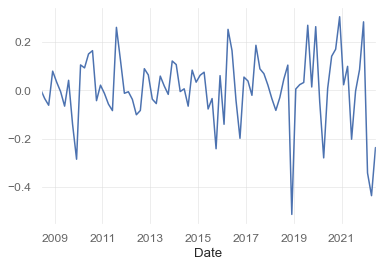

In [79]:
syn_index_returns.plot()

<AxesSubplot:xlabel='Date'>

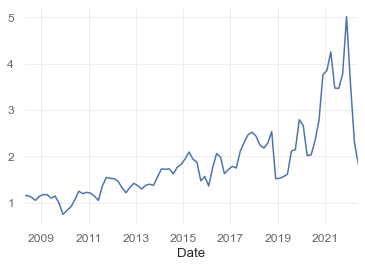

In [80]:
syn_index.plot()

In [81]:
synthetic_index

,0,1,2,3,4
Date,,,,,
2008-04-30,1.293477,1.134198,1.129105,1.118176,1.082295
2008-06-30,1.364383,1.155729,1.052876,1.081196,1.121744
2008-08-31,1.056710,1.157652,1.090956,1.147074,1.131598
2008-10-31,1.062046,1.111588,1.159677,1.135580,0.781931
2008-12-31,1.066722,1.130202,1.225533,1.477922,0.785217
...,...,...,...,...,...
2021-10-31,2.262081,1.871901,8.406953,4.951569,1.376450
2021-12-31,2.465359,9.066316,1.824340,5.233205,6.467676
2022-02-28,8.033861,4.119602,1.799580,2.138718,1.712333


In [82]:
def calcular_indice(cartera, data_precio):
    """
    Voy a equiponderar los pesos de cada activo
    en cartera.
    :return: índice sintético y retornos
    """
    synthetic_index = pd.DataFrame(np.zeros((cartera.shape[0], cartera.shape[1])), index=cartera.index)
    for idx in cartera.index:
        # Selecciono los activos de la cartera
        activos = cartera.loc[idx].tolist()

        # Cojo los precios del df de precios para esos activos

        for i in range(len(activos)):
            synthetic_index.loc[idx, i] = data_precio.loc[idx, activos[i]]

    # Ahora ya tengo un DF con los datos en base_cero de mis carteras.
    # Construyo el índice
    peso = 1/synthetic_index.shape[1]
    syn_index = np.sum(synthetic_index*peso, axis=1)
    syn_index_returns = np.log(syn_index).diff().dropna(axis=0)

    return syn_index, syn_index_returns

In [83]:
a, b = calcular_indice(cartera_sharpe, precio_cero_resample)

<AxesSubplot:xlabel='Date'>

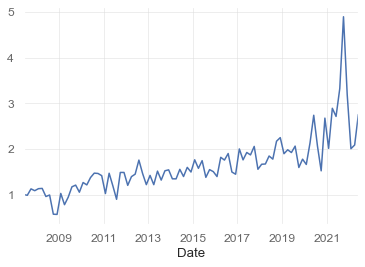

In [84]:
a.plot()

<AxesSubplot:xlabel='Date'>

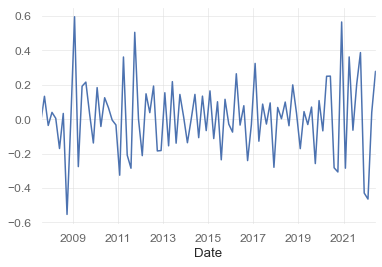

In [85]:
b.plot()

Llegado aquí, verfica si comparas retornos o precios

Haz un df con precios y otro con retornos

In [86]:
# Actauliza

In [87]:
# Momentum
momentum_index, momentum_returns = calcular_indice(cartera_momentum, precio_cero_resample)

<AxesSubplot:xlabel='Date'>

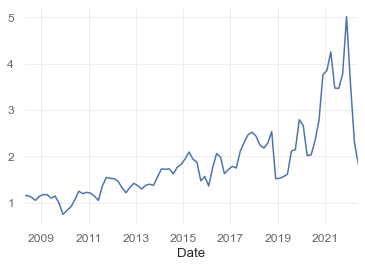

In [88]:
momentum_index.plot()

<AxesSubplot:xlabel='Date'>

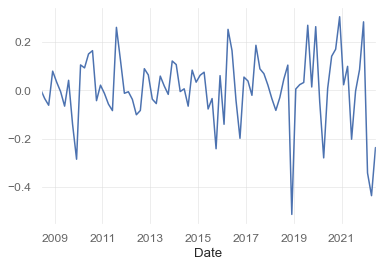

In [89]:
momentum_returns.plot()

C:\Users\nicol\Documents\mIA-x\TFM\Backtest\venv\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


<AxesSubplot:xlabel='Date'>

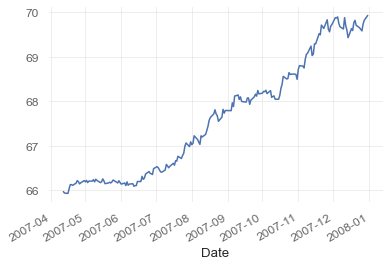

In [90]:
closeyf.loc[:'31-12-2007', 'SHY'].plot()

El cáclulo del ratio de sharpe está bien y viendo los datos tiene sentido...la varaición es muy baja con rentabilidad positiva. Quizá deberíamos contrastar los datos con otra fuente.

Comparo con la primera cartera que tenía por rentabilidad

In [91]:
ranking.iloc[1]

0    GLD
1    HYG
2    TLH
3    TIP
4    SHV
Name: 2007-06-30 00:00:00, dtype: object

Me hago una función que me ordene un df y me genere carteras seleccionando n_activos.

In [92]:
def seleccion_top_N(data, n_activos):
    ranking = []
    for fila in range(data.shape[0]):
        ranking.append(data.iloc[fila, :].sort_values(ascending=False).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=data.index)
    ranking_df = ranking_df.iloc[:, :5]
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

Ahora voy a calcular ratios

Calculo la Beta

beta = cov(rent_i, rent_mercado)/var(rent_mercado)

In [93]:
def calcular_beta(data, indice, periodo):

    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    return beta.iloc[periodo:,:]

In [94]:
beta = calcular_beta(closeyf, ew_index_base_cero, 40) # Tomo como reerncia 2M (40 días de trading)
beta

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,1.226691,0.001094,0.069852,0.207295,0.280717,1.277782,1.589652,0.441897,0.211415,1.959673,2.003606,1.313491,1.068854,1.526539,1.833439,0.016818,0.093609,2.226653,0.944889,1.595621
2007-06-11,1.188398,0.001205,0.077220,0.216006,0.287862,1.291755,1.592888,0.452220,0.217358,1.973452,2.015192,1.323152,1.032459,1.535706,1.836924,0.018638,0.096773,2.197817,0.939586,1.594314
2007-06-12,1.114977,0.002723,0.145564,0.247874,0.371583,1.325323,1.598625,0.544349,0.274929,1.962953,1.909366,1.330821,0.966537,1.433187,1.836251,0.031618,0.136067,2.219889,0.976706,1.462849
2007-06-13,1.086191,-0.002187,0.149658,0.267138,0.422746,1.439062,1.497039,0.626561,0.279596,1.956359,1.976129,1.305978,0.940728,1.389301,1.853138,0.026862,0.135920,2.088205,0.928396,1.511199
2007-06-14,1.074355,-0.000804,0.150481,0.263023,0.410264,1.435787,1.501683,0.606379,0.276024,1.999545,1.991034,1.329017,0.942268,1.403254,1.849290,0.024528,0.131643,2.081514,0.928109,1.472032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,0.129185,0.002502,0.486709,0.137945,0.075897,1.166187,1.240641,0.094045,0.034696,1.293518,1.287368,1.875542,1.023311,2.037685,0.687089,0.012797,0.019756,1.207178,0.996234,1.259613
2022-06-07,0.139474,0.002446,0.484039,0.140160,0.091166,1.171465,1.234341,0.113646,0.041541,1.315010,1.279560,1.869958,1.031949,2.009357,0.687324,0.012811,0.022818,1.212946,0.991948,1.255631
2022-06-08,0.151239,0.002427,0.487594,0.141696,0.084631,1.200700,1.232992,0.099128,0.038696,1.263250,1.310156,1.853031,1.014463,1.998339,0.696350,0.014407,0.023362,1.232964,1.009884,1.282719


In [95]:
beta_resample = beta.resample('2M').last()
beta_resample

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.919119,-0.000543,0.192249,0.307594,0.470000,1.330214,1.385587,0.685743,0.309730,2.145670,1.875741,1.266871,1.016398,1.197909,2.061729,0.047005,0.161740,2.132020,0.816930,1.523497
2007-08-31,0.424858,-0.018861,0.548279,-0.231762,-0.350049,1.873073,1.731018,-0.362627,-0.344894,2.301943,2.349712,1.598838,1.276158,1.996862,2.024991,-0.133380,-0.290414,2.265582,1.066286,2.381979
2007-10-31,0.622384,-0.008689,0.706358,-0.087213,-0.161674,1.824586,1.434197,-0.347140,-0.271384,2.519240,2.629579,1.413630,1.198928,1.890744,1.417368,-0.059616,-0.109881,2.203473,0.793625,2.350544
2007-12-31,0.979890,-0.022720,0.076104,-0.489371,-0.534612,1.847481,2.372529,-0.613320,-0.472884,2.937207,2.772785,1.843908,1.199298,1.767876,1.018030,-0.169988,-0.380415,2.752548,0.963732,2.939272
2008-02-29,0.156437,-0.014504,0.087041,-0.145164,-0.261893,1.825002,2.326285,-0.250514,-0.295070,2.603633,2.434292,1.846291,0.953559,2.146178,1.697226,-0.095766,-0.205462,3.015806,1.026008,3.265940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.119176,0.001500,0.319803,0.090883,0.163765,1.504188,1.246922,0.244343,0.068489,1.429353,1.577144,1.761262,1.216600,1.362984,0.995050,0.006645,0.028260,1.174530,0.966254,1.611386
2021-12-31,0.253753,0.002996,0.444536,0.094211,-0.328957,1.587559,0.960686,-0.528270,-0.236451,1.915875,1.303970,2.094102,0.713918,1.889120,0.842432,-0.018394,-0.114623,1.373655,0.757434,1.471708
2022-02-28,-0.005829,0.004504,0.405952,0.153903,0.131505,1.211187,1.506408,0.129003,0.129442,0.379712,1.274584,2.099869,1.039040,2.018544,0.801763,0.054821,0.105174,1.264003,0.536451,1.135016


In [96]:
cartera_beta = seleccion_top_N(beta_resample, 5)
cartera_beta

,0,1,2,3,4
Date,,,,,
2007-06-30,XLE,ICF,XLU,XLB,XLF
2007-08-31,XLF,XLB,XLE,ICF,XLU
2007-10-31,XLB,XLE,XLF,ICF,XLY
2007-12-31,XLF,XLE,XLB,ICF,IYZ
2008-02-29,XLF,ICF,XLE,XLB,IYZ
...,...,...,...,...,...
2021-10-31,XLK,XLF,XLB,XLI,XLE
2021-12-31,XLK,XLE,XLY,XLI,XLF
2022-02-28,XLK,XLY,IYZ,XLB,ICF


Me puede interesar buscar o filtar los ETFs con Beta positiva máxima. Esto me va a indicar que activos se han movido más que el mercado. Si pienso en que busco los activos que "amplifican" el valor del mercado en la dirección del movimineto, debería estar obteniendo los valores que más tiran de mi índice sintético

Alfa de Jensen

alpha = (rentabilidad_cartera -fisk_free) - Beta*(rentabilidad_mercado - risk_free)

In [97]:
def calcular_alfa_jensen(data, indice, periodo):
    '''Supongo la rentabilidad del activo libre
    de riesgo '0'. POr eso no cosidero éste activo en
    el cálculo. Voy a calcular la alfa de cada activo
    sólo sobre el índice.
    '''
    # No Llamo a la función calcular Beta porque necesito las tripas
    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    alpha_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del DAX y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    # Ahora calculo alfa:
    alpha=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)
    Rfactivos=pd.DataFrame(np.ones((beta.shape[0] , beta.shape[1])), index=beta.index, columns=beta.columns)

     # Calculamos el Alpha del activo. α=Rc-(Rf+β(Rm-Rf))
    alpha[periodo:alpha.shape[0]] = (rent_activos[periodo:rent_activos.shape[0]] -
                                beta[periodo:beta.shape[0]].mul(rent_indice[periodo:rent_activos.shape[0]], axis=0)
                                )

    alpha=alpha[periodo:alpha.shape[0]]

    return alpha

In [98]:
alpha = calcular_alfa_jensen(closeyf, ew_index_base_cero, 40)
alpha

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,-0.022584,0.000177,-0.003056,0.000734,-0.000872,0.007017,0.007807,-0.003183,0.000745,-0.006284,0.008342,0.006928,-0.002328,0.004652,-0.002590,0.000286,-0.000497,-0.001877,0.000822,0.003140
2007-06-11,0.007456,0.000092,-0.002114,-0.002140,-0.002689,0.001303,-0.001748,-0.002865,-0.002615,0.007643,-0.008685,0.001982,0.000287,-0.003291,0.013166,0.000126,0.000204,-0.017290,0.005455,0.004570
2007-06-12,0.001542,0.000118,-0.003695,-0.003834,-0.007640,-0.000096,0.001670,-0.009285,-0.004459,0.006768,0.006286,0.001076,0.002136,0.005781,0.001418,-0.000569,-0.002936,0.004219,0.000051,0.000513
2007-06-13,-0.004468,-0.000161,0.000202,0.000950,0.003386,0.008765,-0.006479,0.005396,0.000390,-0.000316,0.002944,-0.000738,-0.001546,-0.002785,0.000698,-0.000025,0.000230,-0.009147,-0.001885,0.003285
2007-06-14,-0.002342,0.000734,0.000292,-0.000226,-0.002869,0.000522,0.002270,-0.004456,-0.000629,0.010308,0.001278,0.005163,-0.000222,0.002603,0.000344,-0.000078,-0.000826,-0.006638,-0.001509,-0.006292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.004368,-0.000181,-0.007359,-0.006481,-0.015565,0.004589,0.002289,-0.018583,-0.007524,-0.000662,0.009870,0.000732,0.000515,0.010669,0.004671,-0.001320,-0.004014,-0.003451,0.000757,0.003308
2022-06-07,0.005384,-0.000020,-0.001559,0.001261,0.007762,0.004007,-0.004316,0.009835,0.003688,0.018932,-0.003036,-0.003064,0.004697,-0.018497,0.000523,0.000018,0.001663,0.002367,-0.002649,-0.002329
2022-06-08,0.000575,-0.000067,-0.003762,-0.001058,-0.006480,-0.006349,0.010764,-0.007916,-0.003341,0.014707,-0.007983,0.007033,0.002130,0.013912,-0.012849,-0.000580,-0.001529,-0.012475,-0.002310,-0.005020


In [99]:
alpha_resample = alpha.resample('2M').last()
alpha_resample

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,-0.001432,2.752489e-04,-0.003176,0.005346,0.007501,0.001295,-0.005060,0.009082,0.004658,-0.000222,0.002952,-0.005698,-0.004584,-0.000797,0.004301,0.001918,0.002939,-0.010621,-0.000301,-0.008145
2007-08-31,0.008244,-6.455199e-05,0.005586,0.001044,0.001384,0.003445,-0.003192,0.003041,0.002380,-0.001182,-0.005616,-0.003382,-0.003266,0.003843,-0.014650,0.000829,0.001510,0.007309,-0.004018,-0.001674
2007-10-31,0.012019,-3.228946e-05,0.001436,-0.004157,-0.001130,-0.003839,-0.001448,-0.006693,-0.004865,0.009285,0.008075,0.001997,-0.002091,-0.009955,0.001894,-0.001188,-0.002740,0.000648,0.000915,-0.002683
2007-12-31,-0.004344,-2.333751e-04,0.002356,0.005453,0.004252,-0.000470,-0.005831,0.004670,0.003554,-0.006228,0.000200,-0.003366,-0.001003,0.000276,-0.011574,0.001204,0.002190,0.015145,-0.005807,0.006203
2008-02-29,0.003548,3.576626e-05,-0.002958,0.008998,0.010298,-0.009425,-0.008737,0.012669,0.007672,-0.007602,-0.008294,-0.002018,-0.004353,-0.003674,-0.012820,0.002490,0.006243,0.008508,-0.008684,-0.000336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,-0.008530,-1.809089e-04,-0.002604,-0.002551,0.001035,0.000465,-0.007059,0.003080,0.000444,-0.006421,-0.004619,0.004489,0.009830,0.002750,-0.005843,0.000117,-0.000152,-0.010605,-0.000868,-0.003776
2021-12-31,0.006778,-3.632236e-07,-0.000284,-0.001249,0.002199,0.004069,-0.006779,0.002023,-0.001101,0.002293,0.004266,-0.005131,-0.004336,-0.002623,0.003397,-0.000115,-0.000297,0.003125,0.006675,-0.001969
2022-02-28,0.010322,-9.834616e-05,0.000035,0.016951,0.019190,0.005601,-0.009487,0.021465,0.011084,0.023743,-0.013591,-0.005346,-0.009336,0.003620,0.003818,0.001683,0.006185,-0.020292,-0.014296,-0.016853


Calculo las carteras con alpha de jensen

In [100]:
cartera_alpha = seleccion_top_N(alpha_resample, 5)

Ratio Sharpe

Sharpe = (rent_i - risk_free)/sigma

In [101]:
def calcula_sharpe(data, periodo_ajuste=252):
    """Voy a calcular el ratio de sharpe con
    retorno log.
    Voy a considerar la rentabilidad del activo libre
    de riesgo igual a 0.

    Por defecto, voy a trabajar en ventana de 6 meses,
    pero dejo input para modificar este valor.
    """
    rent_activos = np.log(data).diff()
    volatilidad = rent_activos.std()
    # sharpe = rent_activos.iloc[ventana:] / volatilidad.iloc[ventana:]
    sharpe = np.sqrt(periodo_ajuste)*(rent_activos / volatilidad)
    sharpe.replace([np.inf, -np.inf], 0, inplace=True)

    return sharpe


In [102]:
sharpe = calcula_sharpe(closeyf, 252)
sharpe.head()

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13,17.857828,13.100750,-3.956874,-9.879147,-5.328758,-0.308538,5.052885,-5.188565,-6.352271,0.376926,2.329578,0.919854,20.417734,0.849601,-0.316352,-9.356609,-7.102180,10.874283,5.578515,3.228429
2007-04-16,11.643435,13.120818,-0.832059,12.644870,8.877820,8.904479,11.109580,9.212171,4.084297,4.636075,13.353158,9.160331,13.448727,10.989942,7.586495,-2.344220,4.516569,-1.958770,3.709193,18.461442
2007-04-17,-8.306915,6.559507,-1.042336,2.366045,11.116895,0.000000,-1.427491,9.348915,15.844312,-4.510301,-9.483444,2.277657,4.323720,4.477930,5.974110,30.421697,20.617058,10.675699,15.366775,-0.210193
2007-04-18,7.892637,45.821152,0.624426,12.993084,7.800879,3.054065,2.852477,8.351607,8.572132,-2.768992,-5.422441,-2.734212,-0.392756,-0.838670,9.377488,25.678805,9.637750,-4.381877,-4.288183,8.758433


Por curiosidad hago un resample de 2 meses

In [103]:
sharpe_resample = calcula_sharpe(closeyf, 252).resample('2M').last()
sharpe_resample.head()

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,-9.887481,13.120456,0.206647,21.141406,13.579265,-13.070800,-5.727692,17.466837,16.202732,-9.445479,-18.565778,-8.515069,-4.671166,-14.059752,-4.950057,13.988607,19.228079,-5.903573,-6.107383,-5.984662
2007-06-30,0.220266,19.632374,-6.176340,23.256421,21.047949,3.993894,-3.041016,17.209879,19.419363,2.760920,6.223678,-3.855825,-3.982176,1.401511,10.151017,37.460432,20.822980,-5.223640,1.860609,-4.226829
2007-08-31,15.413408,-13.004973,19.526550,-1.564497,-2.000281,16.763319,8.623247,1.320855,0.888748,10.392693,9.025779,7.196095,6.564504,17.898853,-2.673247,0.000000,-1.904662,16.100227,4.367895,10.061682
2007-10-31,23.065610,-6.573895,13.635105,-18.814835,-5.668588,9.636563,9.562410,-15.207863,-25.146130,21.039458,26.234393,12.841071,8.628747,3.311930,14.988585,-29.920031,-22.602824,11.861694,10.655878,10.298164
2007-12-31,-9.244731,-13.079569,4.748479,25.888507,13.782199,-5.098013,-12.678948,10.118692,17.230444,-10.119392,-6.008199,-8.211815,-5.175062,-4.035333,-17.869604,29.671113,19.650082,6.785856,-13.335960,-0.264980


Tengo que eliminar la primera fila para que me cuadren las fechas

In [104]:
sharpe_resample = sharpe_resample.iloc[1:, :]
sharpe_resample

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.220266,19.632374,-6.176340,23.256421,21.047949,3.993894,-3.041016,17.209879,19.419363,2.760920,6.223678,-3.855825,-3.982176,1.401511,10.151017,37.460432,20.822980,-5.223640,1.860609,-4.226829
2007-08-31,15.413408,-13.004973,19.526550,-1.564497,-2.000281,16.763319,8.623247,1.320855,0.888748,10.392693,9.025779,7.196095,6.564504,17.898853,-2.673247,0.000000,-1.904662,16.100227,4.367895,10.061682
2007-10-31,23.065610,-6.573895,13.635105,-18.814835,-5.668588,9.636563,9.562410,-15.207863,-25.146130,21.039458,26.234393,12.841071,8.628747,3.311930,14.988585,-29.920031,-22.602824,11.861694,10.655878,10.298164
2007-12-31,-9.244731,-13.079569,4.748479,25.888507,13.782199,-5.098013,-12.678948,10.118692,17.230444,-10.119392,-6.008199,-8.211815,-5.175062,-4.035333,-17.869604,29.671113,19.650082,6.785856,-13.335960,-0.264980
2008-02-29,2.800690,12.982051,-8.321509,41.367801,32.733428,-30.847120,-36.603097,25.452864,39.763000,-26.734602,-32.901804,-22.583611,-19.611211,-27.786240,-38.549440,64.679442,53.738877,-16.393453,-31.828734,-25.399729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,-12.101458,-12.960278,-5.738160,-10.134759,2.571213,0.319175,-8.219381,5.114789,1.631473,-5.221406,-4.829577,4.703334,13.640216,2.851585,-7.694557,2.183986,-1.003760,-8.089739,-1.646373,-3.041085
2021-12-31,9.642811,0.000000,-0.498961,-4.896997,5.466074,4.737714,-7.598990,3.283786,-4.224080,2.001070,4.446844,-5.358078,-5.984196,-2.637263,4.516784,-2.192977,-2.010368,2.478403,11.343939,-1.373239
2022-02-28,14.605079,-6.496679,1.557803,68.093260,49.150841,8.490153,-7.932060,36.343600,42.258474,19.316855,-11.506136,-1.994972,-10.686142,7.726184,6.668764,33.272922,41.156562,-13.679519,-22.455801,-11.458753


Calulo el top_5

In [105]:
cartera_sharpe = seleccion_top_N(sharpe_resample, 5)
cartera_sharpe

,0,1,2,3,4
Date,,,,,
2007-06-30,SHY,TIP,TLH,IEI,SHV
2007-08-31,HYG,XLY,XLI,ICF,GLD
2007-10-31,XLB,GLD,XLE,XLU,HYG
2007-12-31,SHY,TIP,IEI,IEF,TLH
2008-02-29,SHY,IEI,TIP,IEF,TLH
...,...,...,...,...,...
2021-10-31,XLV,TLT,XLK,XLY,TLH
2021-12-31,XLP,GLD,TLH,XLI,XLU
2022-02-28,TIP,TLH,IEF,IEI,TLT


Comparo con la primera cartera que tenía por rentabilidad

In [106]:
ranking.iloc[1]

0    GLD
1    HYG
2    TLH
3    TIP
4    SHV
Name: 2007-06-30 00:00:00, dtype: object

Idea. Puedo construir carteras y asigna peso a cada ETF por cada cartera en la que aparezac. Puedo equiponderar y asignar peso/num_carteras

Cuántas carteras hago?
- Jensen
- Sharpe
- Beta
- Momentum
- Media_Movil_Close>Indice equiponderado--> Selecciono los 5 que más se separen porcentualmente de la media.

Qué etiquetas tiene la red?

Momentum

In [107]:

from pandas import Timestamp

def calculate_momentum(data):
    '''Esta función calcula el momentum para un sólo activo.
    En caso de querer aplicarla a un DF, los datos
    deben ser introducidos en bucle for o usada en
    en apply()
    '''
    # Calculo el log de los datos para transformar el dataset. Son precios de cierre en escala log
    # Con esto convierto el problema de la regresión exponencial en lineal.
    # REcuerda que usamos reg exponencial porque viene epresada en %, mientras que la reg lineal, lo están en $
    log_data = np.log(data)

    # Horizontal values
    # Piensa que esto es
    x_data = np.arange(len(log_data))

    # De la regresión, sólo me interesan la pendiente y la precisión:
    beta, _, rvalue, _, _ = linregress(x_data, log_data)

    # Anualizamos la pendiente. Esto tengo que valorarlo en función de cómo quiero que
    # evolucione mi algoritmo. Creo que no me interesa anualizar y trabajar en ventana rodante
    # Si no anualizamos, calcularemos el porcentaje de movimiento por día.
    # Y multiplicamos por la precisión del modelo
    # Al mulitplicar por r2, está filtrando acciones con momentum alto pero mal ajustados
    # R2 = 1 - RSS/TSS
    return  (1+beta)**252*(rvalue**2)

Ahora tengo que calcular el momentum de cada ETF.

In [108]:
def filtro_momentum(data, periodo_momentum, resampling='2M'):
    """Este filtro se basa en una condición de momento positvo
    en ventana rodante.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data, periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo momentum
    momentum = pd.DataFrame(columns = data.columns)

    for stock in data.columns:
        # Voy a recorrer la lista de acciones para calcular su ventana rodante
        # y sobre ese dato, calculo el momento usando apply. PIensa que lo que estás haciend
        # es calcular la regresión exponencial cada X días
        momentum[stock] = data[stock].rolling(periodo_momentum).apply(calculate_momentum, raw=False)

    momentum = momentum.resample('{}'.format(resampling)).last()

    return momentum

In [109]:
momentum = filtro_momentum(closeyf, 252, '2M').dropna(axis=0)
momentum

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,1.422601,1.044139,0.005881,1.121585,1.053577,0.150748,0.529020,1.005307,1.110708,0.595732,0.169783,0.264057,0.404696,0.644783,0.001796,1.072447,1.109103,0.379495,0.301540,0.581926
2008-06-30,1.151672,0.999095,0.047360,1.029273,0.815253,0.277749,0.505068,0.713293,0.908177,0.725510,0.369920,0.308673,0.495135,0.571883,0.065982,0.929558,0.899661,0.120756,0.218392,0.561821
2008-08-31,0.524573,0.959991,0.259055,0.874477,0.566427,0.456221,0.487211,0.421461,0.672062,0.218193,0.017157,0.409694,0.498762,0.534127,0.082288,0.774222,0.664669,0.151197,0.019644,0.521219
2008-10-31,0.015351,0.964617,0.317999,0.043123,0.347621,0.367633,0.397418,0.382264,0.485443,0.128357,0.209571,0.386536,0.466259,0.374532,0.383555,0.739395,0.567254,0.150298,0.137019,0.454955
2008-12-31,0.393967,0.986053,0.426783,0.259368,0.391584,0.388247,0.384330,0.512776,0.457108,0.296376,0.317273,0.381919,0.475475,0.384574,0.444888,0.740126,0.584560,0.255650,0.337984,0.343999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.178921,0.757069,0.908268,0.847209,0.124575,0.954980,0.832395,0.084541,0.182219,1.036176,0.893675,1.206444,1.112250,1.028997,0.645001,0.174123,0.318898,1.319679,0.861668,1.293394
2021-12-31,0.013043,0.864766,0.792512,0.915263,0.075854,0.721851,0.252450,0.190744,0.000399,0.786432,0.757973,1.234905,1.037634,1.018417,0.805274,0.558062,0.328006,1.277113,0.927121,1.040579
2022-02-28,0.112162,0.779581,0.092709,0.600643,0.118529,0.218773,0.079107,0.255052,0.013216,0.840256,0.416780,0.952519,0.766719,0.634197,0.676239,0.617550,0.431488,0.852902,0.924160,0.893721


El problema es que me como un año de histórico...Hay que valorarlo

In [110]:
cartera_momentum = seleccion_top_N(momentum, 5)
cartera_momentum

,0,1,2,3,4
Date,,,,,
2008-04-30,GLD,TIP,IEF,IEI,SHY
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-08-31,SHV,TIP,SHY,IEF,IEI
2008-10-31,SHV,SHY,IEI,IEF,XLV
2008-12-31,SHV,SHY,IEI,TLT,XLV
...,...,...,...,...,...
2021-10-31,ICF,XLF,XLK,XLV,XLE
2021-12-31,ICF,XLK,XLF,XLV,XLY
2022-02-28,XLK,XLP,XLF,ICF,XLE


Media móvil. Pongo por defecto un periodo de 252, que es un año de trading y parece un periodo macro razonable. Otra alternativa sería fijar 40 ó 60 días en función de lo que acordemos como marco de referencia y comparar.

In [111]:
def filtro_SMA(data, indice, periodo=252, resampling='2M'):
    """Este filtro se basa en una media móvil simple
    sobre le precio de cierre.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data con precios de cierre, índice con precios de cierre
            periodo_sma y periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo SMA del dataframe de datos
    sma_data = data.rolling(periodo).mean().resample(resampling).last().dropna(axis=0)
    # Ahora mi índice
    sma_index = indice.rolling(252).mean().resample('2M').last().dropna(axis=0)


    sma_distance = sma_data.sub(sma_index, axis=0)

    # return
    return sma_distance

Cómo calculo la distancia a la media del índice:
- Calculo media móvil del precio de cada ETF.
- Calculo media móvil de mi índice sintético.
- Resto mm_etf - mm_índice.
- Ordeno y cojo los 5 que más se separan. No voy a exigir que la dif sea positiva, no quiero los que sean positivos, sino los que mejor se hayan comportado sobre la media; habrá periodos en los que alguno de los top5 sea negativo? O exigo que sea positivo y genero cartera con num_activos <= 5. Esto también tendría sentido si lo que voy a asignar es un peso positivo en cartera a los activos top.

Voy a descojonar el cálculo a ver qué estoy haciendo...

In [112]:
# Calculo un df con la media móvil de los precios de cierre
sma_data = closeyf.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_data

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,77.556270,100.018119,39.998627,69.591937,71.021182,28.719352,19.901512,59.541678,61.778190,47.528088,29.662396,20.272926,26.819942,28.720947,23.913328,68.929401,81.888406,26.392587,18.773581,19.170911
2008-06-30,81.268016,100.735799,40.029270,71.142617,72.228081,28.671855,19.105620,60.558225,62.959214,49.630924,30.224280,20.189368,26.262710,27.714045,24.017867,69.752045,83.300720,25.849837,18.901333,17.936825
2008-08-31,84.982301,101.385008,40.066649,72.756068,73.518627,28.116434,18.027871,61.686195,64.177812,50.422401,30.255694,19.789840,25.997604,26.563145,24.029858,70.531023,84.705561,25.400175,19.041127,16.575352
2008-10-31,86.269682,101.980413,38.965149,73.470727,74.687884,26.670683,16.456829,62.940838,65.299558,48.590921,29.039677,18.657546,25.199945,25.077945,23.229504,71.324809,86.161074,24.112961,18.934437,14.958403
2008-12-31,85.985198,102.466162,37.243529,73.265792,76.315305,24.721312,15.030654,65.103964,66.700253,45.672905,26.923775,17.185300,23.959026,23.330728,21.971935,72.068926,87.805474,22.102624,18.414490,13.261357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,169.363690,110.391568,83.114068,119.570078,146.711430,95.871508,31.335987,144.012082,115.199808,45.700998,77.991549,139.151242,120.027985,171.218942,62.751022,85.896930,130.095380,59.886696,67.135239,33.864863
2021-12-31,168.311230,110.376540,83.769086,120.853575,145.263646,99.134429,31.891675,142.852997,114.543520,49.267595,81.204195,147.107221,124.418973,179.652894,63.916723,85.819108,129.595112,63.203388,68.586656,35.899430
2022-02-28,168.245635,110.347760,83.876160,121.416266,144.055240,101.264663,31.956360,141.847924,113.775401,52.962298,83.146645,151.427235,127.125388,182.814936,65.143689,85.622094,128.844212,65.635536,70.453575,37.316411


In [113]:
# Ahora mi índice
sma_index = ew_index_base_cero.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_index

Date
2008-04-30    1.028861
2008-06-30    1.033107
2008-08-31    1.032524
2008-10-31    1.011873
2008-12-31    0.980847
                ...   
2021-10-31    2.668960
2021-12-31    2.743476
2022-02-28    2.789417
2022-04-30    2.825827
2022-06-30    2.821995
Freq: 2M, Length: 86, dtype: float64

In [114]:
dif = sma_data.sub(sma_index, axis=0)
dif

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,76.527408,98.989257,38.969766,68.563076,69.992321,27.690491,18.872650,58.512817,60.749329,46.499227,28.633535,19.244065,25.791081,27.692086,22.884467,67.900540,80.859545,25.363725,17.744719,18.142050
2008-06-30,80.234908,99.702692,38.996163,70.109510,71.194973,27.638747,18.072512,59.525117,61.926107,48.597816,29.191172,19.156260,25.229602,26.680938,22.984760,68.718937,82.267613,24.816730,17.868226,16.903718
2008-08-31,83.949777,100.352484,39.034125,71.723544,72.486103,27.083910,16.995348,60.653671,63.145288,49.389877,29.223170,18.757316,24.965080,25.530622,22.997335,69.498499,83.673037,24.367651,18.008603,15.542829
2008-10-31,85.257809,100.968540,37.953276,72.458854,73.676011,25.658810,15.444955,61.928965,64.287685,47.579047,28.027804,17.645672,24.188072,24.066072,22.217630,70.312936,85.149201,23.101087,17.922564,13.946530
2008-12-31,85.004351,101.485315,36.262682,72.284944,75.334458,23.740465,14.049807,64.123117,65.719406,44.692058,25.942927,16.204453,22.978178,22.349880,20.991088,71.088079,86.824627,21.121777,17.433642,12.280510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,166.694731,107.722608,80.445108,116.901118,144.042470,93.202549,28.667028,141.343123,112.530848,43.032039,75.322589,136.482283,117.359026,168.549982,60.082063,83.227970,127.426420,57.217736,64.466279,31.195903
2021-12-31,165.567754,107.633065,81.025611,118.110099,142.520170,96.390953,29.148199,140.109521,111.800044,46.524119,78.460719,144.363745,121.675497,176.909418,61.173247,83.075632,126.851636,60.459913,65.843180,33.155954
2022-02-28,165.456218,107.558342,81.086743,118.626849,141.265823,98.475245,29.166943,139.058507,110.985984,50.172881,80.357227,148.637818,124.335971,180.025519,62.354272,82.832677,126.054795,62.846119,67.664158,34.526994


In [115]:
media = filtro_SMA(closeyf, ew_index_base_cero, 252, '2M')
media

,GLD,SHV,HYG,TIP,TLH,XLI,IYZ,TLT,IEF,XLE,XLB,XLK,XLV,XLY,XLU,SHY,IEI,ICF,XLP,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,76.527408,98.989257,38.969766,68.563076,69.992321,27.690491,18.872650,58.512817,60.749329,46.499227,28.633535,19.244065,25.791081,27.692086,22.884467,67.900540,80.859545,25.363725,17.744719,18.142050
2008-06-30,80.234908,99.702692,38.996163,70.109510,71.194973,27.638747,18.072512,59.525117,61.926107,48.597816,29.191172,19.156260,25.229602,26.680938,22.984760,68.718937,82.267613,24.816730,17.868226,16.903718
2008-08-31,83.949777,100.352484,39.034125,71.723544,72.486103,27.083910,16.995348,60.653671,63.145288,49.389877,29.223170,18.757316,24.965080,25.530622,22.997335,69.498499,83.673037,24.367651,18.008603,15.542829
2008-10-31,85.257809,100.968540,37.953276,72.458854,73.676011,25.658810,15.444955,61.928965,64.287685,47.579047,28.027804,17.645672,24.188072,24.066072,22.217630,70.312936,85.149201,23.101087,17.922564,13.946530
2008-12-31,85.004351,101.485315,36.262682,72.284944,75.334458,23.740465,14.049807,64.123117,65.719406,44.692058,25.942927,16.204453,22.978178,22.349880,20.991088,71.088079,86.824627,21.121777,17.433642,12.280510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,166.694731,107.722608,80.445108,116.901118,144.042470,93.202549,28.667028,141.343123,112.530848,43.032039,75.322589,136.482283,117.359026,168.549982,60.082063,83.227970,127.426420,57.217736,64.466279,31.195903
2021-12-31,165.567754,107.633065,81.025611,118.110099,142.520170,96.390953,29.148199,140.109521,111.800044,46.524119,78.460719,144.363745,121.675497,176.909418,61.173247,83.075632,126.851636,60.459913,65.843180,33.155954
2022-02-28,165.456218,107.558342,81.086743,118.626849,141.265823,98.475245,29.166943,139.058507,110.985984,50.172881,80.357227,148.637818,124.335971,180.025519,62.354272,82.832677,126.054795,62.846119,67.664158,34.526994


In [116]:
cartera_media = seleccion_top_N(media, 5)
cartera_media

,0,1,2,3,4
Date,,,,,
2008-04-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-08-31,SHV,GLD,IEI,TLH,TIP
2008-10-31,SHV,GLD,IEI,TLH,TIP
2008-12-31,SHV,IEI,GLD,TLH,TIP
...,...,...,...,...,...
2021-10-31,XLY,GLD,TLH,TLT,XLK
2021-12-31,XLY,GLD,XLK,TLH,TLT
2022-02-28,XLY,GLD,XLK,TLH,TLT


Cojo como fecha de partida para comparar el 30/06/2008, que sería la primera fecha que podríamos utilizar con esta propuesta

In [117]:
print("Cartera de media móvil", cartera_media.iloc[1,:])
print("Cartera Momentum", cartera_momentum.iloc[1, :])
print("Cartera Sharpe", cartera_sharpe.iloc[6,:])
print("Cartera Alpha de Jensen", cartera_alpha.iloc[6, :])
print("Cartera Beta", cartera_beta.iloc[6,:])

Cartera de media móvil 0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Momentum 0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object
Cartera Sharpe 0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Alpha de Jensen 0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object
Cartera Beta 0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object


In [118]:
carteras = pd.DataFrame([cartera_media.iloc[1,:], cartera_momentum.iloc[1, :], cartera_sharpe.iloc[6,:], cartera_alpha.iloc[6, :],                              cartera_beta.iloc[6,:]])
carteras

,0,1,2,3,4
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-06-30,XLU,SHV,IYZ,XLV,XLP
2008-06-30,XLU,IYZ,XLE,XLV,XLI
2008-06-30,ICF,XLB,IYZ,XLE,XLF


Qué sentido tiene esto?? Veo por sectores

"XLB", # Materials. 1998-12-22
"XLE", # Energy. 1998-12-22
"XLF", # Financial. 1998-12-22
"XLI", # Industrial. 1998-12-22
"XLK", # Technology. 1998-12-22
"XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
"XLU", # Utilities. 1998-12-22
"XLV", # Health Care. 1998-12-22
"XLY", # Consumer Discretionary. 1998-12-22
"GLD", # Oro. 2004-11-18 *******************************
"SHV", # Short Treasury Bond. 2007-01-11 ***************
"SHY", # 1-3 Year Treasury Bond. 2002-07-30
"IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
"IEF", # 7-10 Year Treasury Bond. 2002-07-30
"TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
"TLT", # +20 Year Treasury Bond. 2002-07-30
"TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
"ICF", # Inmobiliario. 2001-02-02
"IYZ", # Telecomunicaciones. 2000-05-22
'HYG' # High Yield. 2007


 Cartera SMA es una cartera que pondera la renta fija. Tiene sentido si pienso que venimos de la crisis de 2007 y todavía no se ha alterado la política monetaria.

In [119]:
#
carteras.iloc[0,:]
# Renta fija  a corot plazo (SHV)
# Renta fija medio plazo (IEI)
# Gold
# Renta fija largo plazo (TLH)
# Renta fija ligada a inflación (TIP)

0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object

Momentum: idem..cartera que pondera la renta fija

In [120]:
carteras.iloc[1,:]
# Gold
# Renta fija a inflación (TIP)
# Renta fija a corto (SHV)
# Deuda a 3 años (SHY)
# DEdua 7 años


0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object

Cartera Sharpe: Creo que esta cartera está viendo otra fase del ciclo. Ver donde encajan utilities, teleco, Helath Care...

In [121]:

carteras.iloc[2,:]
# Utilities (xlu)
# Renta fija a corto (SHV)
# Telecomunicaciones (IYZ)
# Health Care (XLV)
# Consumer Saples (XLP)

0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object

Alpha:

In [122]:
carteras.iloc[3,:]
# Utilities (xlu)
# Telecomunicaciones (IYZ)
# Energia (XLE)
# Health Care (XLV)
# Industrial (XLI)


0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object

Beta: esta cartera aunque parezca rara, tiene mucho sentido...En plena crisis inmobiliaria y de crédito pondera inmobiliario, materiales y servicios financieros...pero al final, estamos cogiendo los movimientos mas fuertes en sentido de mercado...Qué beta tienen estos activos?

In [123]:
beta_resample.loc['2008-06-30',:].sort_values(ascending=False)

ICF    2.577387
XLB    2.564437
IYZ    2.397975
XLE    2.261692
XLF    2.222899
XLY    2.152482
XLK    2.052351
XLI    1.817721
XLU    1.454589
XLP    1.445236
XLV    1.389435
HYG    0.283058
SHV   -0.001643
SHY   -0.042309
IEI   -0.139949
GLD   -0.149723
TIP   -0.175564
IEF   -0.202912
TLT   -0.243979
TLH   -0.250811
Name: 2008-06-30 00:00:00, dtype: float64

In [124]:
carteras.iloc[4,:]
# Inmobiliario(ICF)
# Materiales (XLB)
# Telecomunciaciones (IYZ)
# Energia (XLE)
# Financieros(XLF)

0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object

Qué hubiese pasado si hubiese invertido 2 meses en esta cartera?? Coge los precios de compra en esa fecha y cierra venta en el siguiente periodo.

Desde aqui, me lo ha borrado.

Creo recordar que lo que había hecho era una función para generar un índice sintético por cartera. Con estos índices, deberíq generar un DF y calcular la corr de cada índice con los retorno del índice EW que he usado al principio.

Función para calcular sintético

In [125]:
def calcular_sintetico(cartera, data_input):
    synthetic_data = pd.DataFrame(np.zeros((cartera.shape[0], cartera.shape[1])), index = cartera.index)
    # Ahora tengo que recorrer cada fila de mi cartera y sacar los precios
    for idx in cartera.index:
        activos = cartera.loc[idx, :].tolist()
        #print(activos)
        # Ahora recorrro cada activo y le asigno un precio. Recuerda que tomas como ref el precio en base 1
        for activo in range(len(activos)):
            synthetic_data.loc[idx, activo] = data_input.loc[idx, activos[activo]]

    # Ahora me tengo que construir el índice. En principio va a ser equiponderado. También se puede intentar constuir con otros pesos
    pesos = 1/len(activos)
    index = np.sum(synthetic_data*peso, axis=1)
    # Calculo los retornos
    synthetic_returns = np.log(index).diff().dropna(axis=0)

    return index, synthetic_returns, synthetic_data

In [126]:
synthetic_momentum_index, synthetic_momentum_returns, synthetic_momentum_data = calcular_sintetico(cartera_momentum, precio_cero_resample)

<AxesSubplot:xlabel='Date'>

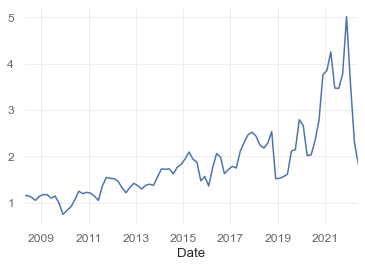

In [127]:
synthetic_momentum_index.plot()

<AxesSubplot:xlabel='Date'>

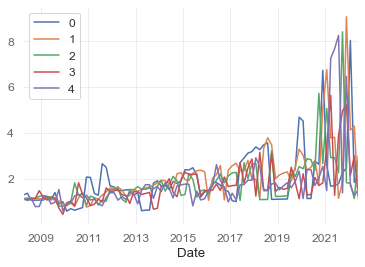

In [128]:
synthetic_momentum_data.plot()

<AxesSubplot:xlabel='Date'>

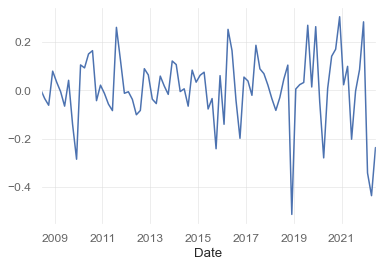

In [129]:
synthetic_momentum_returns.plot()

Construyo todos los índices

In [130]:
synthetic_momentum_index, synthetic_momentum_returns, synthetic_momentum_data = calcular_sintetico(cartera_momentum, precio_cero_resample)
synthetic_sharpe_index, synthetic_sharpe_returns, synthetic_sharpe_data = calcular_sintetico(cartera_sharpe, precio_cero_resample)
synthetic_media_index, synthetic_media_returns, synthetic_media_data = calcular_sintetico(cartera_media, precio_cero_resample)
synthetic_alpha_index, synthetic_alpha_returns, synthetic_alpha_data = calcular_sintetico(cartera_alpha, precio_cero_resample)
synthetic_beta_index, synthetic_beta_returns, synthetic_beta_data = calcular_sintetico(cartera_beta, precio_cero_resample)

Construyo un df con mis índices

En primer lugar, tengo que calcular los retornos del EW

In [131]:
ew_index_base_cero

Date
2007-04-12    1.000000
2007-04-13    1.002255
2007-04-16    1.008118
2007-04-17    1.009830
2007-04-18    1.011164
                ...   
2022-06-06    2.702260
2022-06-07    2.723911
2022-06-08    2.697010
2022-06-09    2.654220
2022-06-10    2.603755
Length: 3820, dtype: float64

In [132]:
ew_index_base_cero_resample = ew_index_base_cero.resample('2M').last()

In [133]:
ew_index_base_cero_returns = np.log(ew_index_base_cero_resample).diff().dropna(axis=0)

In [134]:
indexes_returns = pd.DataFrame(ew_index_base_cero_returns, columns=['EW'])

In [135]:
indexes_returns

,EW
Date,
2007-06-30,-0.002026
2007-08-31,0.004007
2007-10-31,0.045386
2007-12-31,-0.012024
2008-02-29,-0.025940
...,...
2021-10-31,0.011364
2021-12-31,0.037987
2022-02-28,-0.059946


Meto los datos de mis índices sintéticos

In [136]:
indexes_returns['Momentum'] = synthetic_momentum_returns
indexes_returns['Media'] = synthetic_media_returns
indexes_returns['Sharpe'] = synthetic_sharpe_returns
indexes_returns['Alpha_Jensen'] = synthetic_alpha_returns
indexes_returns['Beta'] = synthetic_beta_returns

El problema que va a tener esto es que nos vamos a comer parte del histórico de datos...Quitando los NAs de los retornos, nos vamos a 2008

In [137]:
indexes_returns.dropna(axis=0)

,EW,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,,
2008-06-30,-0.020978,0.003239,0.014609,-0.170239,-0.148849,-0.096899
2008-08-31,-0.006383,-0.033795,-0.016328,0.033681,-0.241421,-0.154013
2008-10-31,-0.171004,-0.061519,-0.054071,-0.553227,-0.342137,-0.274374
2008-12-31,0.045479,0.079551,0.104350,-0.008239,-0.008239,-0.106012
2009-02-28,-0.098335,0.034294,-0.009531,0.595792,-0.168764,-0.232094
...,...,...,...,...,...,...
2021-10-31,0.011364,0.085926,0.028249,0.387523,0.408428,0.172687
2021-12-31,0.037987,0.283631,0.038885,-0.429130,-0.365573,0.198760
2022-02-28,-0.059946,-0.341721,-0.091950,-0.464036,-0.519579,-0.115392


<AxesSubplot:xlabel='Date'>

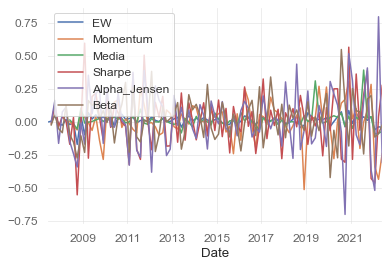

In [138]:
indexes_returns.plot()

Miro los índices con precio para comparar

In [139]:
indexes_precio = pd.DataFrame(ew_index_base_cero, columns=['EW'])
indexes_precio['Momentum'] = synthetic_momentum_index
indexes_precio['Media'] = synthetic_media_index
indexes_precio['Sharpe'] = synthetic_sharpe_index
indexes_precio['Alpha_Jensen'] = synthetic_alpha_index
indexes_precio['Beta'] = synthetic_beta_index
indexes_precio.dropna(axis=0, inplace=True)

In [140]:
indexes_precio.head()

,EW,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,,
2008-04-30,1.041298,1.151450,1.142141,1.134965,1.184383,1.030316
2008-06-30,1.019681,1.155185,1.158949,0.957301,1.020582,0.935164
2008-10-31,0.853938,1.050165,1.080165,0.569393,0.569393,0.609314
2008-12-31,0.893671,1.137119,1.198971,0.564721,0.564721,0.548026
2009-04-30,0.867622,1.170333,1.184183,0.777993,0.678879,0.510605


<AxesSubplot:xlabel='Date'>

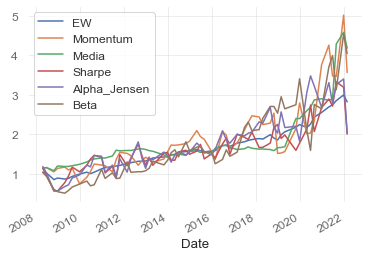

In [141]:
indexes_precio.plot()

Correlación índice-features

In [142]:
indexes_returns.columns

Index(['EW', 'Momentum', 'Media', 'Sharpe', 'Alpha_Jensen', 'Beta'], dtype='object')

In [143]:
features = ['Momentum', 'Media', 'Sharpe', 'Alpha_Jensen', 'Beta']

In [144]:
for feature in features:
    r2 = indexes_returns[feature].corr(indexes_returns['EW'])
    print(f'El r2 de de EW con {feature} es {r2:.2f}')

El r2 de de EW con Momentum es 0.29
El r2 de de EW con Media es 0.34
El r2 de de EW con Sharpe es 0.17
El r2 de de EW con Alpha_Jensen es 0.28
El r2 de de EW con Beta es 0.42


Debido al ruido de los retornos, recuerda que una correlacion >0.2 o 0.3 es una correlación buena. Esto significa que una aproximación podría ser eliminar de las features el ratio de sharpe y quedarnos con las demás, que explican mejor la evolución de los retornos del índice

Valorar graficar las distribuciones y su corr

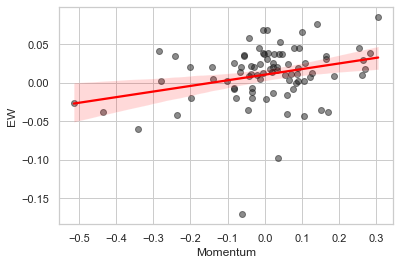

In [145]:
import seaborn as sns
sns.set(style='whitegrid')

graph = sns.regplot(x='Momentum', y='EW', data=indexes_returns,
                    line_kws={"color":'red'},
                    scatter_kws={"color":"k", 'alpha': .5})


## Multicolinealidad

Ahora vamos a ver si las features se superponen o añaden información redundante.

In [146]:
indexes_returns.corr()['EW'][1:]

Momentum        0.287166
Media           0.343305
Sharpe          0.173422
Alpha_Jensen    0.283089
Beta            0.419320
Name: EW, dtype: float64

Calculo la media

In [147]:
indexes_returns.corr()['EW'][1:].abs().mean()

0.3012602591906589

La correlación es alta, teniendo en cuenta la cantidad de ruido blando que hay en los datos y que no responden una causa contreta y explicable.

Ahora, vamos a analizar si hay multicolinealidad. Necesitamos un espectro amplio de features teniendo en cuanta que las correlaciones como hemos visto son aceptables, pero no altas. La idea aquí tiene que ser encontrar distintas características que puedan explicar los retornos del ínidice y que sean complementarias. Esto dará robustez a la estrategia, puesto que en conjunto tendrán una correlación mayor que explicará mejor la evolución del índice.

En la liteartur he encontrado que se utiliza  el Factor de Infalción de la Varianza (FIV), que es una medida de la corr de cada feature con el resto. Buscamos valores bajos de este indicador, porque esto significa que no está correlacionado con los demás

Fórmula: VIF = 1/(1-R2)
https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

Vamos a usar statsmodel

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cojo todas las columnas excepto 'EW'. Me interesa ver cómo se correlacionan las features entre ellas
features_fiv = indexes_returns.iloc[:, 1:].dropna(axis=0)
cols = features_fiv.columns

In [149]:
features_fiv

,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,
2008-06-30,0.003239,0.014609,-0.170239,-0.148849,-0.096899
2008-08-31,-0.033795,-0.016328,0.033681,-0.241421,-0.154013
2008-10-31,-0.061519,-0.054071,-0.553227,-0.342137,-0.274374
2008-12-31,0.079551,0.104350,-0.008239,-0.008239,-0.106012
2009-02-28,0.034294,-0.009531,0.595792,-0.168764,-0.232094
...,...,...,...,...,...
2021-10-31,0.085926,0.028249,0.387523,0.408428,0.172687
2021-12-31,0.283631,0.038885,-0.429130,-0.365573,0.198760
2022-02-28,-0.341721,-0.091950,-0.464036,-0.519579,-0.115392


In [150]:
VIF = [variance_inflation_factor(features_fiv.values, i) for i in range(len(features_fiv.columns))]

In [151]:
VIF_df = pd.DataFrame(zip(cols, VIF), columns=['feature', 'VIF']).set_index('feature')

In [152]:
VIF_df

,VIF
feature,
Momentum,1.088955
Media,1.051184
Sharpe,1.360456
Alpha_Jensen,1.314968
Beta,1.065011


Esto mes está diciendo que mis features son independientes y no le voy a meter a la red información redundante. Según la teoría, un VIF en el entorno de la unidad, indica ausnecia de colinealidad con el resto y se puede considerar independiente.

Referencia para entender los valores
https://www.statisticshowto.com/variance-inflation-factor/

Finalmente, voy a graficar mediante mapa de calor las correlaciones entre features

<AxesSubplot:>

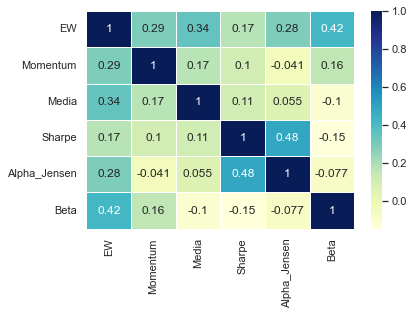

In [153]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(indexes_returns.corr(), annot=True, linewidths=1, cmap="YlGnBu")

## Autorregresión

In [154]:
n_rows = 2
n_col = len(indexes_returns.columns)//2

In [155]:
indexes_returns.columns[1:]

Index(['Momentum', 'Media', 'Sharpe', 'Alpha_Jensen', 'Beta'], dtype='object')

In [156]:
indexes_returns['Media']

Date
2007-06-30         NaN
2007-08-31         NaN
2007-10-31         NaN
2007-12-31         NaN
2008-02-29         NaN
                ...   
2021-10-31    0.028249
2021-12-31    0.038885
2022-02-28   -0.091950
2022-04-30   -0.086867
2022-06-30   -0.071289
Freq: 2M, Name: Media, Length: 91, dtype: float64

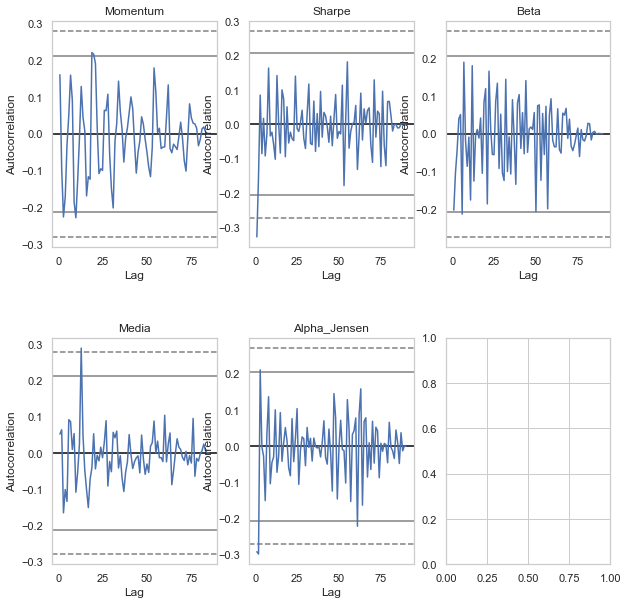

In [157]:
fig, ax = plt.subplots(figsize=(10, 10), ncols= n_col, nrows=n_rows)
for i, feature in enumerate(indexes_returns.columns[1:]):
    # Con r y c me muevo por filas y columnas del subplot
    r = i%2
    c = i//2
    # Plot
    pd.plotting.autocorrelation_plot(indexes_returns[feature].dropna(axis=0), ax=ax[r][c])
    ax[r][c].set_title(feature)

# Los separo
plt.subplots_adjust(hspace=0.4)



https://www.investopedia.com/terms/a/autoregressive.asp

Esto significa que no puedo predecir el futuro en base a lo ocurrido en el pasado porque no hay patrones estacionales?? Los retornos pasados no explican los retornos futuros.

Voy a analizar los momentos de la distribución de los retornos del índice. Voy a tomar una ventana rodante de periodo corto (estamos trabajando con datos bimestrales). Cojo un periodo de n=6, así me voy moviendo en un intervalo de 1 año

In [169]:
n = 6

In [202]:
indexes_returns['Mean'] = indexes_returns['EW'].rolling(n).mean()
indexes_returns['Sigma'] = indexes_returns['EW'].rolling(n).std()
indexes_returns['Kurtosis'] = indexes_returns['EW'].rolling(n).kurt()
indexes_returns['Skew'] = indexes_returns['EW'].rolling(n).skew()

In [203]:
indexes_returns.dropna(axis=0)

,EW,Momentum,Media,Sharpe,Alpha_Jensen,Beta,Sigma,Kurtosis,Skew,Mean
Date,,,,,,,,,,
2008-06-30,-0.020978,0.003239,0.014609,-0.170239,-0.148849,-0.096899,0.026970,-0.079224,0.853311,0.001365
2008-08-31,-0.006383,-0.033795,-0.016328,0.033681,-0.241421,-0.154013,0.027100,0.391337,1.121839,-0.000367
2008-10-31,-0.171004,-0.061519,-0.054071,-0.553227,-0.342137,-0.274374,0.067664,5.031191,-2.161074,-0.036431
2008-12-31,0.045479,0.079551,0.104350,-0.008239,-0.008239,-0.106012,0.075438,3.764898,-1.760946,-0.026848
2009-02-28,-0.098335,0.034294,-0.009531,0.595792,-0.168764,-0.232094,0.080858,-0.041294,-0.959836,-0.038914
...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.011364,0.085926,0.028249,0.387523,0.408428,0.172687,0.036465,-0.973639,0.244177,0.034581
2021-12-31,0.037987,0.283631,0.038885,-0.429130,-0.365573,0.198760,0.027126,0.279142,-0.041078,0.026645
2022-02-28,-0.059946,-0.341721,-0.091950,-0.464036,-0.519579,-0.115392,0.042951,2.764942,-1.401995,0.018857


Voy a analizar la autoregresión de estos indicadores

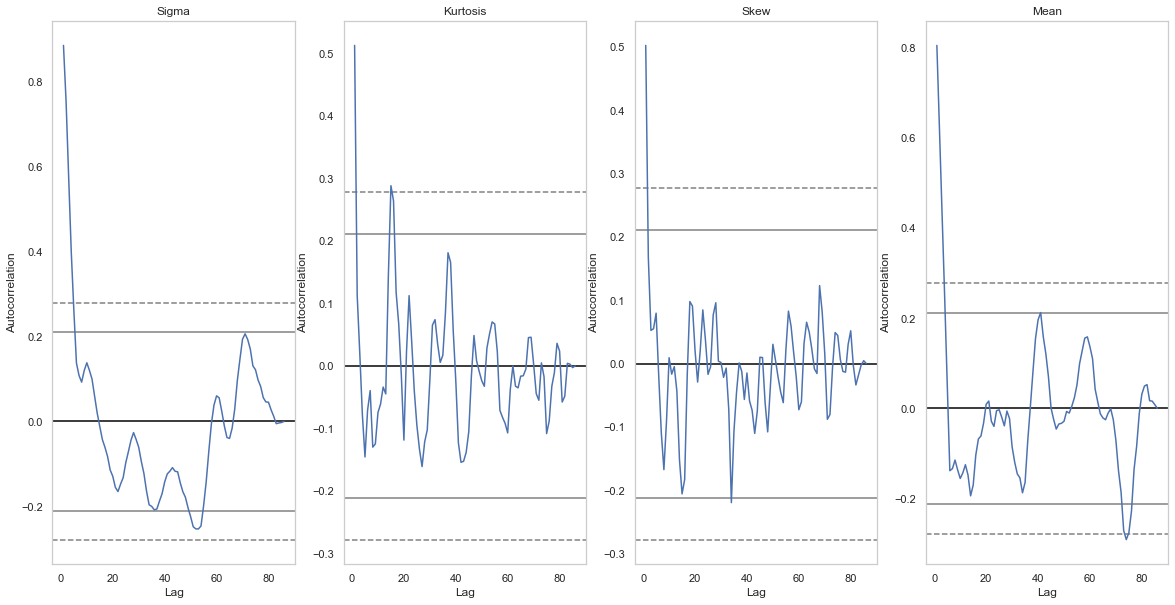

In [204]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=4)
for i, feature in enumerate(indexes_returns.columns[6:]):
    # Plot
    pd.plotting.autocorrelation_plot(indexes_returns[feature].dropna(axis=0), ax=ax[i])
    ax[i].set_title(feature)



Voy a repetir esto con los precios de los ínndices, a ver qué sale

In [158]:
indexes_precio

,EW,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,,
2008-04-30,1.041298,1.151450,1.142141,1.134965,1.184383,1.030316
2008-06-30,1.019681,1.155185,1.158949,0.957301,1.020582,0.935164
2008-10-31,0.853938,1.050165,1.080165,0.569393,0.569393,0.609314
2008-12-31,0.893671,1.137119,1.198971,0.564721,0.564721,0.548026
2009-04-30,0.867622,1.170333,1.184183,0.777993,0.678879,0.510605
2009-06-30,0.885786,1.096442,1.187484,0.942490,0.721828,0.578222
2009-08-31,0.934288,1.143133,1.204346,1.169571,0.893012,0.666167
2009-12-31,0.993069,0.746720,1.240670,1.051550,0.972779,0.740372
2010-04-30,1.041517,0.910534,1.298657,1.211763,1.223443,0.817425


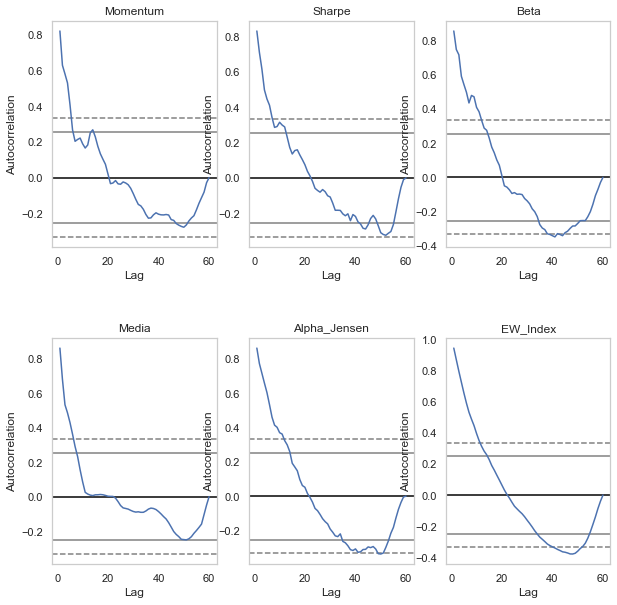

In [161]:
fig, ax = plt.subplots(figsize=(10, 10), ncols= n_col, nrows=n_rows)
for i, feature in enumerate(indexes_precio.columns[1:]):
    # Con r y c me muevo por filas y columnas del subplot
    r = i%2
    c = i//2
    # Plot
    pd.plotting.autocorrelation_plot(indexes_precio[feature].dropna(axis=0), ax=ax[r][c])
    ax[r][c].set_title(feature)
# Ploteo el índice en la úlitma posición
pd.plotting.autocorrelation_plot(indexes_precio['EW'].dropna(axis=0), ax=ax[1][2])
ax[1][2].set_title('EW_Index')
# Los separo
plt.subplots_adjust(hspace=0.4)

<AxesSubplot:xlabel='Date'>

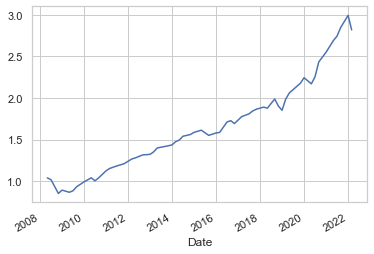

In [162]:
indexes_precio['EW'].plot()

Hago zoom en el intervalo de 45 a 55

In [165]:
indexes_precio.iloc[45:55, 0]

Date
2018-10-31    1.903883
2018-12-31    1.853543
2019-02-28    1.985620
2019-04-30    2.061228
2019-10-31    2.178427
2019-12-31    2.244981
2020-04-30    2.171015
2020-06-30    2.255695
2020-08-31    2.434223
2020-12-31    2.551627
Name: EW, dtype: float64

Esto es una prueba de commit & push

In [382]:
carteras.iloc[4,:]
# Inmobiliario(ICF)
# Materiales (XLB)
# Telecomunciaciones (IYZ)
# Energia (XLE)
# Financieros(XLF)

0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object

Qué hubiese pasado si hubiese invertido 2 meses en esta cartera?? Coge los precios de compra en esa fecha y cierra venta en el siguiente periodo.

Desde aqui, me lo ha borrado.

Creo recordar que lo que había hecho era una función para generar un índice sintético por cartera. Con estos índices, deberíq generar un DF y calcular la corr de cada índice con los retorno del índice EW que he usado al principio.

Función para calcular sintético

In [383]:
def calcular_sintetico(cartera, data_input):
    synthetic_data = pd.DataFrame(np.zeros((cartera.shape[0], cartera.shape[1])), index = cartera.index)
    # Ahora tengo que recorrer cada fila de mi cartera y sacar los precios
    for idx in cartera.index:
        activos = cartera.loc[idx, :].tolist()
        #print(activos)
        # Ahora recorrro cada activo y le asigno un precio. Recuerda que tomas como ref el precio en base 1
        for activo in range(len(activos)):
            synthetic_data.loc[idx, activo] = data_input.loc[idx, activos[activo]]

    # Ahora me tengo que construir el índice. En principio va a ser equiponderado. También se puede intentar constuir con otros pesos
    pesos = 1/len(activos)
    index = np.sum(synthetic_data*peso, axis=1)
    # Calculo los retornos
    synthetic_returns = np.log(index).diff().dropna(axis=0)

    return index, synthetic_returns, synthetic_data

In [390]:
synthetic_momentum_index, synthetic_momentum_returns, synthetic_momentum_data = calcular_sintetico(cartera_momentum, precio_cero_resample)

<AxesSubplot:xlabel='Date'>

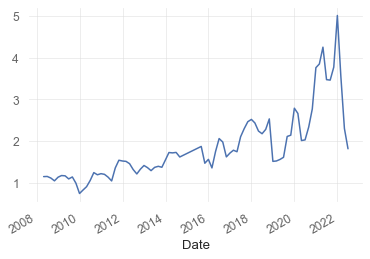

In [391]:
synthetic_momentum_index.plot()

<AxesSubplot:xlabel='Date'>

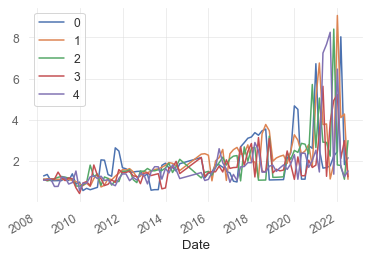

In [252]:
synthetic_momentum_data.plot()

<AxesSubplot:xlabel='Date'>

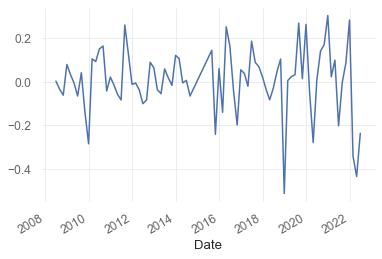

In [392]:
synthetic_momentum_returns.plot()

Construyo todos los índices

In [398]:
synthetic_momentum_index, synthetic_momentum_returns, synthetic_momentum_data = calcular_sintetico(cartera_momentum, precio_cero_resample)
synthetic_sharpe_index, synthetic_sharpe_returns, synthetic_sharpe_data = calcular_sintetico(cartera_sharpe, precio_cero_resample)
synthetic_media_index, synthetic_media_returns, synthetic_media_data = calcular_sintetico(cartera_media, precio_cero_resample)
synthetic_alpha_index, synthetic_alpha_returns, synthetic_alpha_data = calcular_sintetico(cartera_alpha, precio_cero_resample)
synthetic_beta_index, synthetic_beta_returns, synthetic_beta_data = calcular_sintetico(cartera_beta, precio_cero_resample)

Construyo un df con mis índices

En primer lugar, tengo que calcular los retornos del EW

In [405]:
ew_index_base_cero

Date
2007-04-12    1.000000
2007-04-13    1.002255
2007-04-16    1.008118
2007-04-17    1.009830
2007-04-18    1.011164
                ...   
2022-06-06    2.702261
2022-06-07    2.723911
2022-06-08    2.697011
2022-06-09    2.654220
2022-06-10    2.603756
Length: 3820, dtype: float64

In [406]:
ew_index_base_cero_resample = ew_index_base_cero.resample('2M').last()

In [407]:
ew_index_base_cero_returns = np.log(ew_index_base_cero_resample).diff().dropna(axis=0)

In [408]:
indexes_returns = pd.DataFrame(ew_index_base_cero_returns, columns=['EW'])

In [409]:
indexes_returns

,EW
Date,
2007-06-30,-0.002027
2007-08-31,0.004007
2007-10-31,0.045385
2007-12-31,-0.012024
2008-02-29,-0.025940
...,...
2021-10-31,0.011364
2021-12-31,0.037987
2022-02-28,-0.059946


Meto los datos de mis índices sintéticos

In [410]:
indexes_returns['Momentum'] = synthetic_momentum_returns
indexes_returns['Media'] = synthetic_media_returns
indexes_returns['Sharpe'] = synthetic_sharpe_returns
indexes_returns['Alpha_Jensen'] = synthetic_alpha_returns
indexes_returns['Beta'] = synthetic_beta_returns

El problema que va a tener esto es que nos vamos a comer parte del histórico de datos...Quitando los NAs de los retornos, nos vamos a 2008

In [413]:
indexes_returns.dropna(axis=0)

,EW,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,,
2008-06-30,-0.020978,0.003239,0.014609,-0.170239,-0.148849,-0.096899
2008-08-31,-0.006383,-0.033795,-0.016328,0.033681,-0.241421,-0.154014
2008-10-31,-0.171004,-0.061519,-0.054071,-0.553227,-0.342137,-0.274374
2008-12-31,0.045479,0.079551,0.104349,-0.008240,-0.008240,-0.106012
2009-02-28,-0.098335,0.034294,-0.009531,0.595792,-0.168763,-0.232094
...,...,...,...,...,...,...
2021-10-31,0.011364,0.085926,0.028249,0.387523,0.408428,0.172687
2021-12-31,0.037987,0.283631,0.038885,-0.429131,-0.365573,0.198760
2022-02-28,-0.059946,-0.341721,-0.091950,-0.464036,-0.519579,-0.115392


<AxesSubplot:xlabel='Date'>

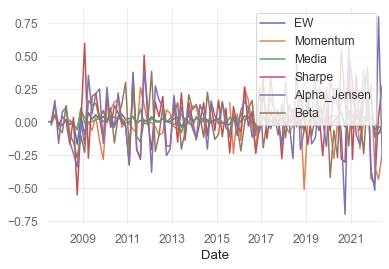

In [414]:
indexes_returns.plot()

Miro los índices con precio para comparar

In [415]:
indexes_precio = pd.DataFrame(ew_index_base_cero, columns=['EW'])
indexes_precio['Momentum'] = synthetic_momentum_index
indexes_precio['Media'] = synthetic_media_index
indexes_precio['Sharpe'] = synthetic_sharpe_index
indexes_precio['Alpha_Jensen'] = synthetic_alpha_index
indexes_precio['Beta'] = synthetic_beta_index
indexes_precio.dropna(axis=0, inplace=True)

In [416]:
indexes_precio.head()

,EW,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,,
2008-04-30,1.041298,1.151450,1.142141,1.134964,1.184384,1.030316
2008-06-30,1.019681,1.155185,1.158948,0.957300,1.020582,0.935164
2008-10-31,0.853938,1.050164,1.080165,0.569393,0.569393,0.609314
2008-12-31,0.893671,1.137119,1.198970,0.564721,0.564721,0.548026
2009-04-30,0.867622,1.170333,1.184183,0.777993,0.678879,0.510605


<AxesSubplot:xlabel='Date'>

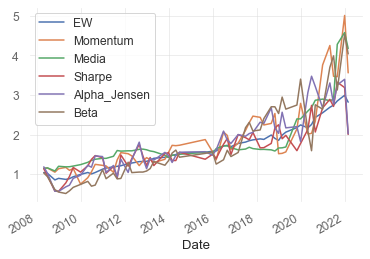

In [417]:
indexes_precio.plot()

Correlación índice-features

In [418]:
indexes_returns.columns

Index(['EW', 'Momentum', 'Media', 'Sharpe', 'Alpha_Jensen', 'Beta'], dtype='object')

In [420]:
features = ['Momentum', 'Media', 'Sharpe', 'Alpha_Jensen', 'Beta']

In [421]:
for feature in features:
    r2 = indexes_returns[feature].corr(indexes_returns['EW'])
    print(f'El r2 de de EW con {feature} es {r2:.2f}')

El r2 de de EW con Momentum es 0.27
El r2 de de EW con Media es 0.34
El r2 de de EW con Sharpe es 0.17
El r2 de de EW con Alpha_Jensen es 0.28
El r2 de de EW con Beta es 0.42


Debido al ruido de los retornos, recuerda que una correlacion >0.2 o 0.3 es una correlación buena. Esto significa que una aproximación podría ser eliminar de las features el ratio de sharpe y quedarnos con las demás, que explican mejor la evolución de los retornos del índice

Valorar graficar las distribuciones y su corr

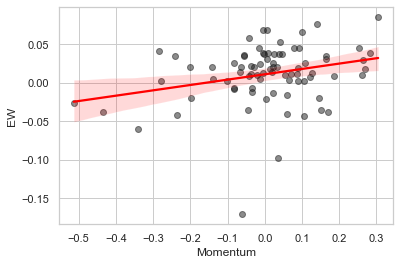

In [423]:
import seaborn as sns
sns.set(style='whitegrid')

graph = sns.regplot(x='Momentum', y='EW', data=indexes_returns,
                    line_kws={"color":'red'},
                    scatter_kws={"color":"k", 'alpha': .5})


## Multicolinealidad

Ahora vamos a ver si las features se superponen o añaden información redundante.

In [429]:
indexes_returns.corr()['EW'][1:]

Momentum        0.274591
Media           0.337588
Sharpe          0.173422
Alpha_Jensen    0.283089
Beta            0.420531
Name: EW, dtype: float64

Calculo la media

In [428]:
indexes_returns.corr()['EW'][1:].abs().mean()

0.29784405233956557

La correlación es alta, teniendo en cuenta la cantidad de ruido blando que hay en los datos y que no responden una causa contreta y explicable.

Ahora, vamos a analizar si hay multicolinealidad. Necesitamos un espectro amplio de features teniendo en cuanta que las correlaciones como hemos visto son aceptables, pero no altas. La idea aquí tiene que ser encontrar distintas características que puedan explicar los retornos del ínidice y que sean complementarias. Esto dará robustez a la estrategia, puesto que en conjunto tendrán una correlación mayor que explicará mejor la evolución del índice.

En la liteartur he encontrado que se utiliza  el Factor de Infalción de la Varianza (FIV), que es una medida de la corr de cada feature con el resto. Buscamos valores bajos de este indicador, porque esto significa que no está correlacionado con los demás

Fórmula: VIF = 1/(1-R2)
https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

Vamos a usar statsmodel

In [443]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cojo todas las columnas excepto 'EW'. Me interesa ver cómo se correlacionan las features entre ellas
features_fiv = indexes_returns.iloc[:, 1:].dropna(axis=0)
cols = features_fiv.columns

In [440]:
features_fiv

,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,
2008-06-30,0.003239,0.014609,-0.170239,-0.148849,-0.096899
2008-08-31,-0.033795,-0.016328,0.033681,-0.241421,-0.154014
2008-10-31,-0.061519,-0.054071,-0.553227,-0.342137,-0.274374
2008-12-31,0.079551,0.104349,-0.008240,-0.008240,-0.106012
2009-02-28,0.034294,-0.009531,0.595792,-0.168763,-0.232094
...,...,...,...,...,...
2021-10-31,0.085926,0.028249,0.387523,0.408428,0.172687
2021-12-31,0.283631,0.038885,-0.429131,-0.365573,0.198760
2022-02-28,-0.341721,-0.091950,-0.464036,-0.519579,-0.115392


In [444]:
VIF = [variance_inflation_factor(features_fiv.values, i) for i in range(len(features_fiv.columns))]

In [445]:
VIF_df = pd.DataFrame(zip(cols, VIF), columns=['feature', 'VIF']).set_index('feature')

In [446]:
VIF_df

,VIF
feature,
Momentum,1.087007
Media,1.052350
Sharpe,1.368363
Alpha_Jensen,1.332030
Beta,1.058873


Esto mes está diciendo que mis features son independientes y no le voy a meter a la red información redundante. Según la teoría, un VIF en el entorno de la unidad, indica ausnecia de colinealidad con el resto y se puede considerar independiente.

Referencia para entender los valores
https://www.statisticshowto.com/variance-inflation-factor/

Finalmente, voy a graficar mediante mapa de calor las correlaciones entre features

<AxesSubplot:>

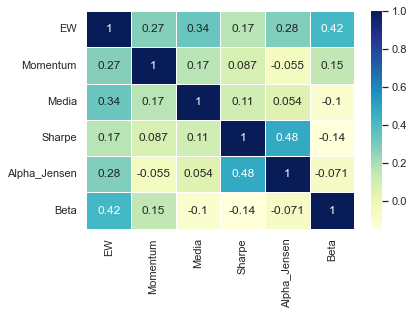

In [450]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(indexes_returns.corr(), annot=True, linewidths=1, cmap="YlGnBu")

## Autorregresión

In [459]:
n_rows = 2
n_col = len(indexes_returns.columns)//2

In [460]:
n_col

3

In [466]:
indexes_returns.columns[1:]

Index(['Momentum', 'Media', 'Sharpe', 'Alpha_Jensen', 'Beta'], dtype='object')

In [467]:
indexes_returns['Media']

Date
2007-06-30         NaN
2007-08-31         NaN
2007-10-31         NaN
2007-12-31         NaN
2008-02-29         NaN
                ...   
2021-10-31    0.028249
2021-12-31    0.038885
2022-02-28   -0.091950
2022-04-30   -0.086867
2022-06-30   -0.071289
Freq: 2M, Name: Media, Length: 91, dtype: float64

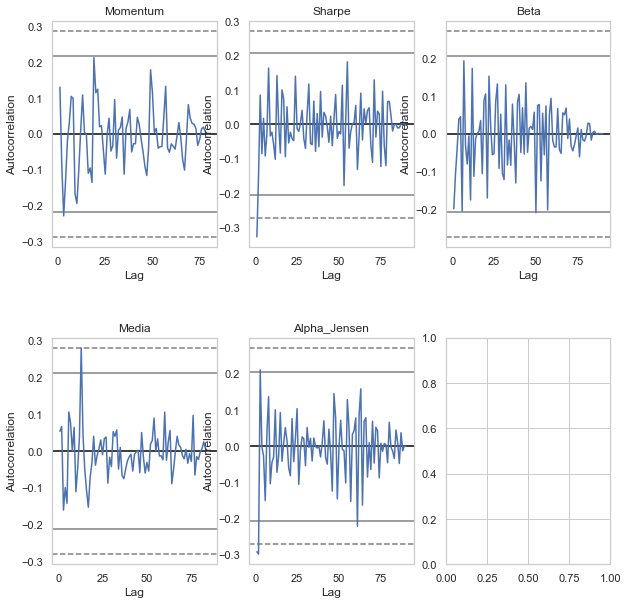

In [468]:
fig, ax = plt.subplots(figsize=(10, 10), ncols= n_col, nrows=n_rows)
for i, feature in enumerate(indexes_returns.columns[1:]):
    # Con r y c me muevo por filas y columnas del subplot
    r = i%2
    c = i//2
    # Plot
    pd.plotting.autocorrelation_plot(indexes_returns[feature].dropna(axis=0), ax=ax[r][c])
    ax[r][c].set_title(feature)

# Los separo
plt.subplots_adjust(hspace=0.4)



https://www.investopedia.com/terms/a/autoregressive.asp

Esto significa que no puedo predecir el futuro en base a lo ocurrido en el pasado porque no hay patrones estacionales?? Los retornos pasados no explican los retornos futuros.

In [470]:
indexes_returns.shape[0]

91


Voy a analizar los momentos de la distribución de los retornos del índice. Voy a tomar una ventana rodante de periodo corto (estamos trabajando con datos bimestrales). Cojo un periodo de n=6, así me voy moviendo en un intervalo de 1 año





In [471]:
n = 6

In [472]:
indexes_returns['Mean'] = indexes_returns['EW'].rolling(n).mean()

indexes_returns['Sigma'] = indexes_returns['EW'].rolling(n).std()

indexes_returns['Kurtosis'] = indexes_returns['EW'].rolling(n).kurt()

indexes_returns['Skew'] = indexes_returns['EW'].rolling(n).skew()

In [473]:
indexes_returns.dropna(axis=0)

,EW,Momentum,Media,Sharpe,Alpha_Jensen,Beta,Mean,Sigma,Kurtosis,Skew
Date,,,,,,,,,,
2008-06-30,-0.020978,0.003239,0.014609,-0.170239,-0.148849,-0.096899,0.001365,0.026970,-0.079233,0.853304
2008-08-31,-0.006383,-0.033795,-0.016328,0.033681,-0.241421,-0.154014,-0.000367,0.027100,0.391339,1.121840
2008-10-31,-0.171004,-0.061519,-0.054071,-0.553227,-0.342137,-0.274374,-0.036431,0.067664,5.031193,-2.161075
2008-12-31,0.045479,0.079551,0.104349,-0.008240,-0.008240,-0.106012,-0.026848,0.075438,3.764899,-1.760946
2009-02-28,-0.098335,0.034294,-0.009531,0.595792,-0.168763,-0.232094,-0.038914,0.080858,-0.041281,-0.959838
...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.011364,0.085926,0.028249,0.387523,0.408428,0.172687,0.034581,0.036465,-0.973638,0.244177
2021-12-31,0.037987,0.283631,0.038885,-0.429131,-0.365573,0.198760,0.026645,0.027126,0.279145,-0.041078
2022-02-28,-0.059946,-0.341721,-0.091950,-0.464036,-0.519579,-0.115392,0.018857,0.042951,2.764943,-1.401995


Voy a analizar la autoregresión de estos indicadores

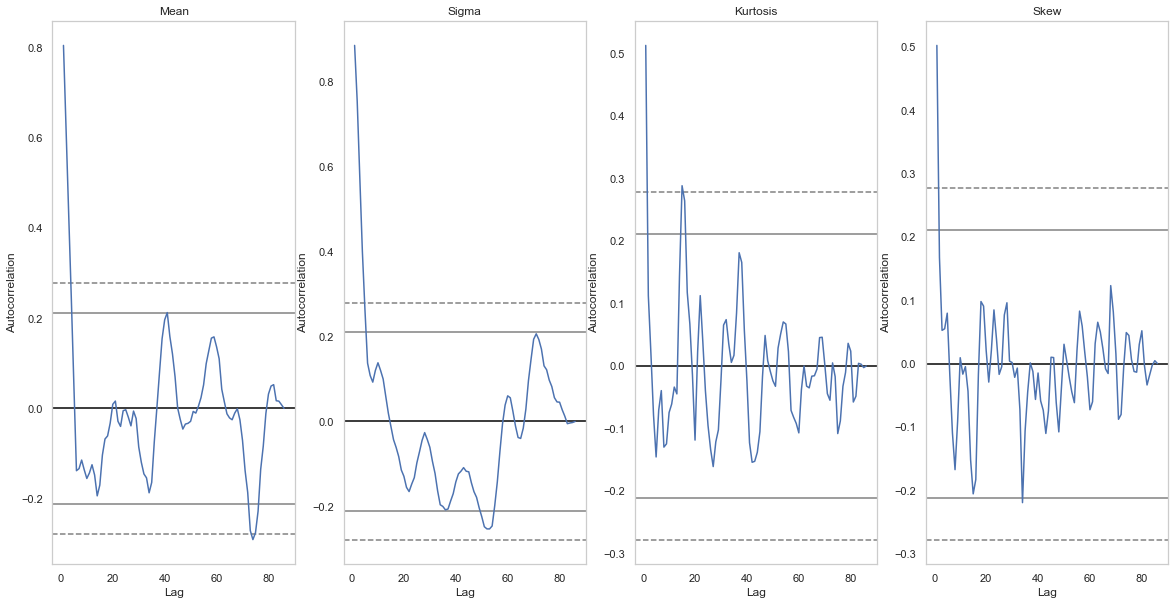

In [474]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=4)

for i, feature in enumerate(indexes_returns.columns[6:]):

    # Plot

    pd.plotting.autocorrelation_plot(indexes_returns[feature].dropna(axis=0), ax=ax[i])
    ax[i].set_title(feature)

Voy a repetir esto con los precios de los índices, a ver qué sale

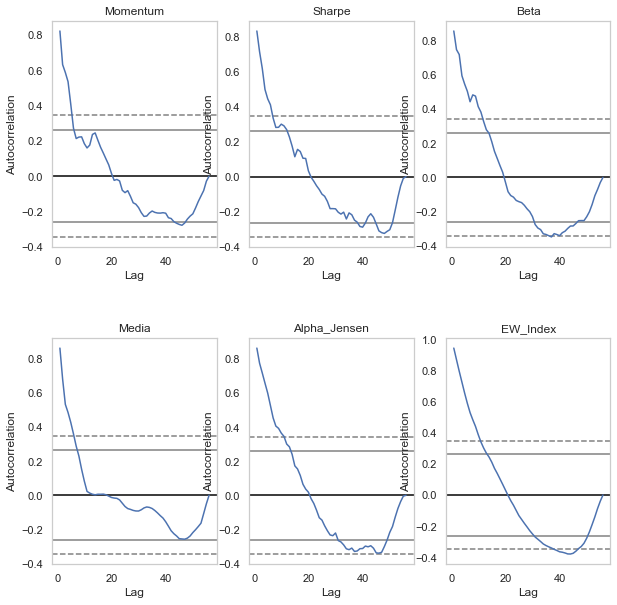

In [475]:
fig, ax = plt.subplots(figsize=(10, 10), ncols= n_col, nrows=n_rows)

for i, feature in enumerate(indexes_precio.columns[1:]):
    # Con r y c me muevo por filas y columnas del subplot
    r = i%2
    c = i//2
    # Plot
    pd.plotting.autocorrelation_plot(indexes_precio[feature].dropna(axis=0), ax=ax[r][c])
    ax[r][c].set_title(feature)

# Ploteo el índice en la úlitma posición
pd.plotting.autocorrelation_plot(indexes_precio['EW'].dropna(axis=0), ax=ax[1][2])
ax[1][2].set_title('EW_Index')

# Los separo
plt.subplots_adjust(hspace=0.4)

<AxesSubplot:xlabel='Date'>

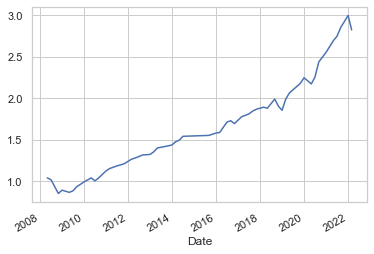

In [476]:
indexes_precio['EW'].plot()

Valora si quieres comparar los estadísticos de las distribuciones para todos los índices sintéticos